In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from glob import glob
# plots
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import os

In [2]:
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.signal import find_peaks
import warnings

In [3]:
from fnmatch import fnmatch, fnmatchcase
# 0612 data
flag = False
filepath_list = list()
root_tag = r'D:\个人文档\data_collect\0612\segments_raw_interpolated\segments_amplitude_raw_tag'
lenth = 0

for dirpath, dirnames, filenames in os.walk(root_tag):
    # print(filenames)
    for filepath in filenames:
        if fnmatch(filepath, '*.csv'):
            filepath_list.append(os.path.join(dirpath, filepath))

            df = pd.read_csv(os.path.join(dirpath, filepath),header=0)

            if flag:
                d_new = pd.concat([d_new, df])
            else:
                d_new = df.copy()
                flag = True
                length = len(df)

df = d_new.copy()

df.shape, length

((161280, 8), 1344)

In [3]:
# columns = ['A-x', 'A-y', 'A-z', 'W-x', 'W-y', 'W-z', 'user', 'type']

df = pd.read_csv(r'D:\vscode_workspace\PracticeLab\IMU_concat2.txt', sep='\t', header = 0)

df.shape

(1352580, 8)

In [4]:
df.sample(5)

,A-x,A-y,A-z,W-x,W-y,W-z,user,type
30271,-0.0859,0.9297,-0.0703,1.5010,0.8901,0.7156,1,sit down
634342,-0.0977,0.9414,-0.0313,1.5359,0.3316,-0.4712,2,walk
424701,0.0000,-0.0524,0.0175,-0.0703,0.9688,-0.2031,2,down stairs
701198,0.7505,-0.0175,-0.1920,-0.2188,0.9492,-0.2891,3,sit down
688746,-0.1484,0.9688,-0.1328,0.0524,0.1047,-0.0524,3,sit down


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1352580 entries, 0 to 1352579
Data columns (total 8 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   A-x     1352580 non-null  float64
 1   A-y     1352580 non-null  float64
 2   A-z     1352580 non-null  float64
 3   W-x     1352580 non-null  float64
 4   W-y     1352580 non-null  float64
 5   W-z     1352580 non-null  float64
 6   user    1352580 non-null  int64  
 7   type    1352580 non-null  object 
dtypes: float64(6), int64(1), object(1)
memory usage: 82.6+ MB


In [7]:
df['type'].describe()

count     1352580
unique          4
top          walk
freq       532272
Name: type, dtype: object

In [8]:
pd.isna(df).sum()

A-x     0
A-y     0
A-z     0
W-x     0
W-y     0
W-z     0
user    0
type    0
dtype: int64

In [55]:
df = df.dropna()

pd.isna(df).sum()

A-x     0
A-y     0
A-z     0
W-x     0
W-y     0
W-z     0
user    0
type    0
dtype: int64

In [4]:
df = df.sort_values(by = ['user'], ignore_index=True)

In [10]:
df

,A-x,A-y,A-z,W-x,W-y,W-z,user,type
0,-0.3320,1.1172,0.1133,-2.8099,-1.6406,0.5236,1,up stairs
1,-0.1172,0.5352,0.8242,0.0000,0.0000,0.0000,1,up stairs
2,-0.1172,0.5352,0.8242,0.0000,0.0000,-0.0175,1,up stairs
3,-0.1133,0.5391,0.8359,0.0000,-0.0175,0.0000,1,up stairs
4,-0.1133,0.5352,0.8281,-0.0524,-0.0175,0.0175,1,up stairs
...,...,...,...,...,...,...,...,...
1352575,0.1396,-0.1047,0.1396,0.2852,0.5234,0.8711,4,up stairs
1352576,0.2443,-0.1920,0.1396,0.1680,0.5000,0.8633,4,up stairs
1352577,0.3316,-0.2967,0.1396,0.1328,0.4648,0.8281,4,up stairs
1352578,0.4363,0.6109,0.1920,0.1055,0.6133,0.8281,4,up stairs


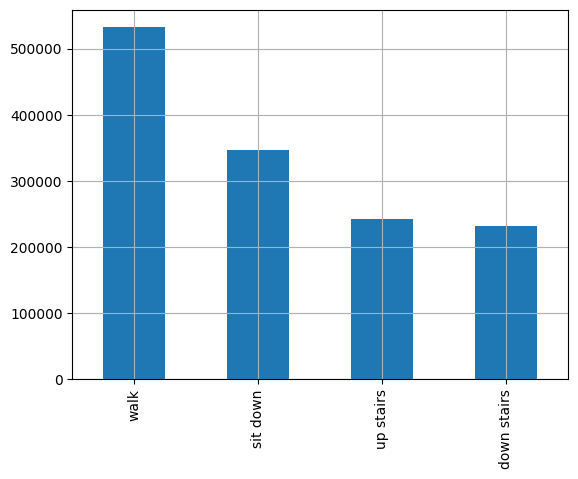

walk           532272
sit down       346380
up stairs      242430
down stairs    231498
Name: type, dtype: int64


In [67]:
# eval activities
activity_stats = df.type.value_counts()
activities = activity_stats.index.tolist()
activity_stats.plot(kind='bar')
plt.grid()
plt.show()
print(activity_stats)

In [68]:
activity_stats

walk           532272
sit down       346380
up stairs      242430
down stairs    231498
Name: type, dtype: int64

In [69]:
activity_stats.index

Index(['walk', 'sit down', 'up stairs', 'down stairs'], dtype='object')

创建四个类别对象

In [70]:
df_walk = df.loc[df['type'] == 'walk']

df_walk.shape

(532272, 8)

In [71]:
df_US = df.loc[df['type'] == 'up stairs']

df_US.shape

(242430, 8)

In [72]:
df_DS = df.loc[df['type'] == 'down stairs']

df_DS.shape

(231498, 8)

In [73]:
df_sitdown = df.loc[df['type'] == 'sit down']

df_sitdown.shape

(346380, 8)

In [74]:
Df_all_list = []
Exp = 0
# Segment the data to 400 sampels frames , each one will be a different Expirament
Segment_Size = 96

# Activety types dict:
activity_codes = {'walk':1,'up stairs':2,'down stairs':3,'sit down':4}        
activity_types = list(activity_codes.keys())

In [75]:
activity_types

['walk', 'up stairs', 'down stairs', 'sit down']

In [76]:
### Missing values
checks = pd.isna(df).sum()
print(checks)

A-x     0
A-y     0
A-z     0
W-x     0
W-y     0
W-z     0
user    0
type    0
dtype: int64


In [16]:
# class_counts = list()

# class_counts.append(df_walk.shape[0])
# class_counts.append(df_US.shape[0])
# class_counts.append(df_DS.shape[0])
# class_counts.append(df_sitdown.shape[0])

# class_counts

Basic Explorations, visualize the size of each class and ...

In [17]:
# x = ['walk', 'US', 'DS', 'sitdown']

# plt.title('Size of each class')
# plt.bar(x, class_counts)

# plt.show()

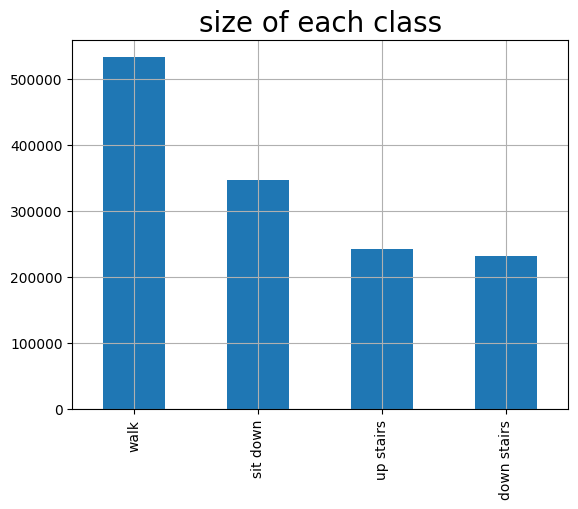

walk           532272
sit down       346380
up stairs      242430
down stairs    231498
Name: type, dtype: int64


In [16]:
# eval activities
activity_stats = df.type.value_counts()
activities = activity_stats.index.tolist()
activity_stats.plot(kind='bar')
plt.title('size of each class', fontsize=20)
plt.grid()
plt.show()
print(activity_stats)

In [17]:
# activity vs. user
pd.crosstab(df.user, df.type)

type,down stairs,sit down,up stairs,walk
user,,,,
1,47964,83238,48552,126738
2,52998,91092,59886,137742
3,68754,86268,66204,134352
4,61782,85782,67788,133440


Look at specific user

In [18]:
# select user
sel_user = 3
df_user = df[df.user==sel_user]

In [19]:
df_user

,A-x,A-y,A-z,W-x,W-y,W-z,user,type
648210,-0.4805,1.2578,0.1563,-3.6302,-1.1868,1.4661,3,up stairs
648211,-0.4336,1.1758,0.2695,-3.5953,-1.5010,1.4486,3,up stairs
648212,-0.3438,1.1172,0.3320,-3.4208,-1.7453,1.3090,3,up stairs
648213,-0.1953,0.9922,0.3555,-3.0717,-2.2514,1.0472,3,up stairs
648214,0.0039,0.9609,0.2656,-2.7925,-2.3387,0.7505,3,up stairs
...,...,...,...,...,...,...,...,...
1003783,-3.1764,1.4486,2.0595,0.1758,0.9688,-0.0195,3,walk
1003784,-3.8746,1.1868,1.6755,0.0742,0.9414,-0.0781,3,walk
1003785,-3.7698,0.6283,1.3962,0.0547,0.9023,-0.1133,3,walk
1003786,-3.8746,1.1868,1.6755,0.0742,0.9414,-0.0781,3,walk


Time series plots

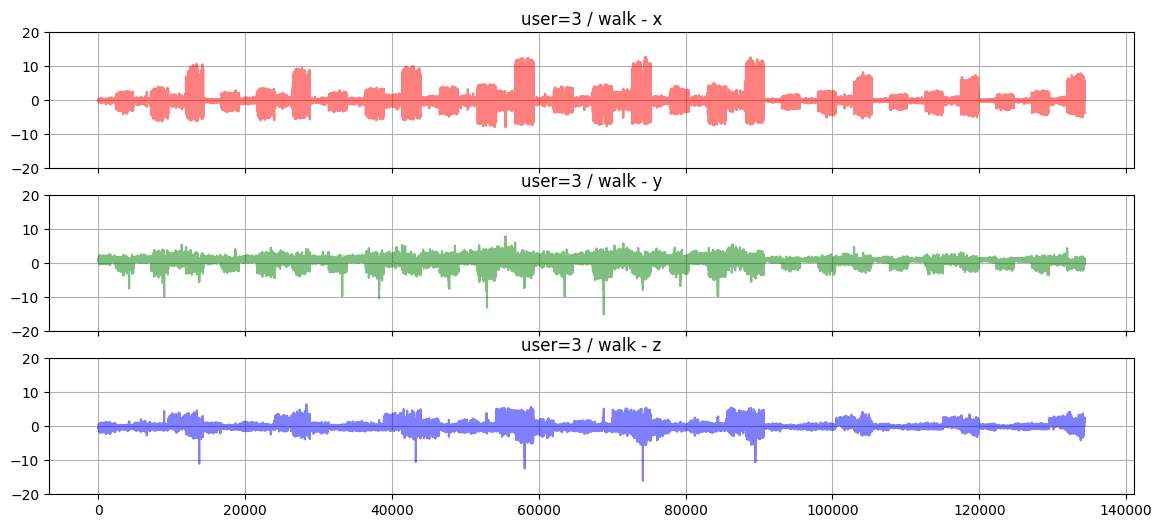

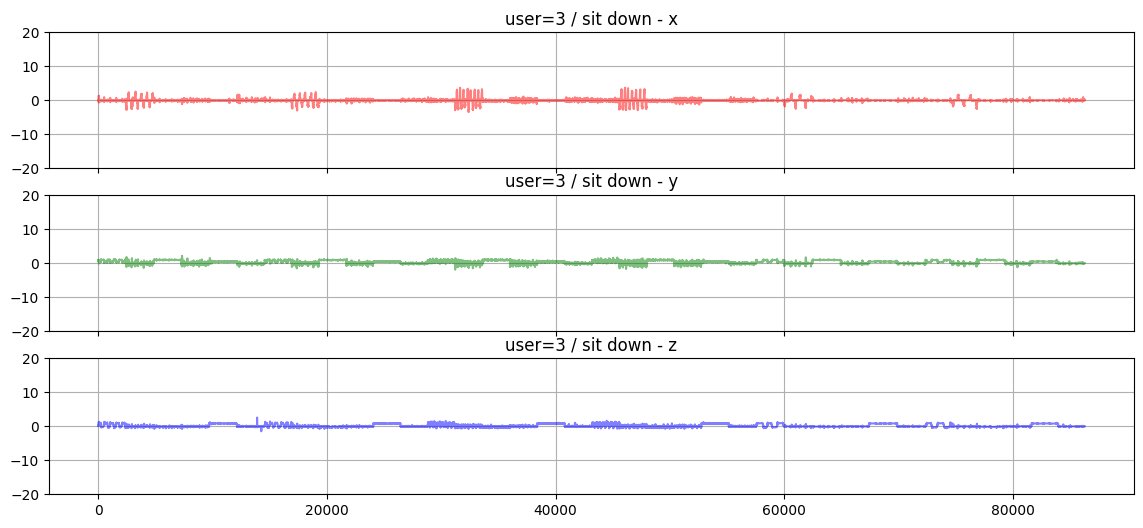

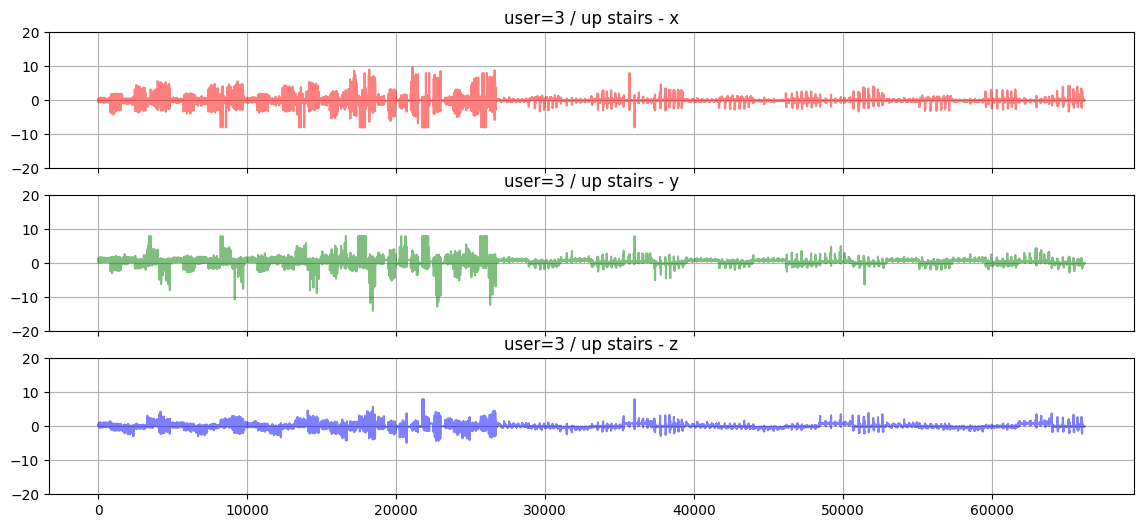

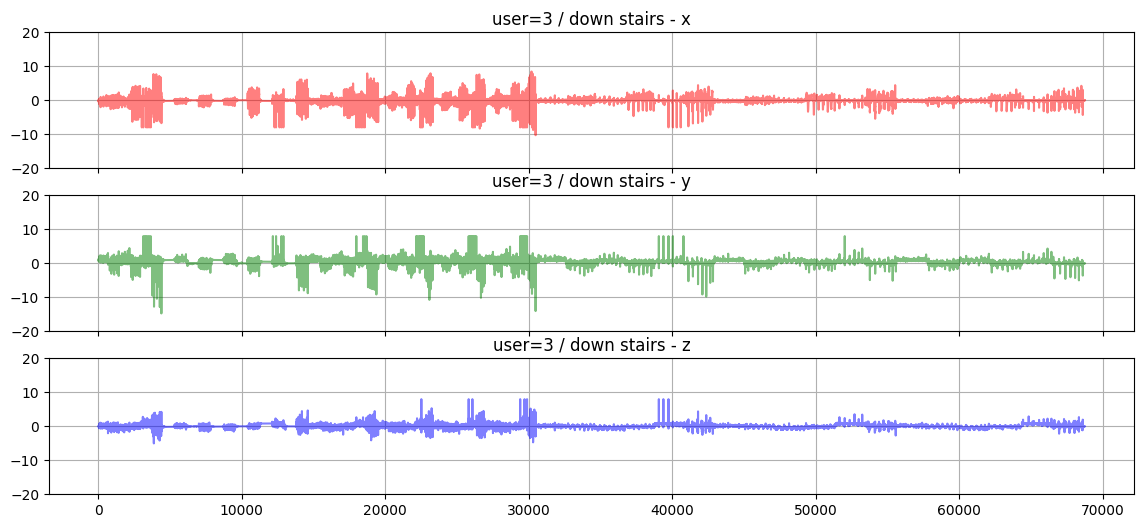

In [20]:
# time series plots
for act in activities:
    df_temp = df_user.loc[df.type==act].copy()
    df_temp.reset_index(inplace=True)
    
    # convert time to seconds and start with 0
    # t_min = df_temp.timestamp.min()
    # df_temp['time_sec'] = (df_temp['timestamp'] - t_min)/1e9
    
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14,6), sharex=True)
    
    ax1.plot(df_temp.index, df_temp['A-x'], color='red', alpha=0.5)
    ax1.set_ylim(-20,20)
    ax1.set_title('user=' + str(sel_user) + ' / ' + act + ' - x')
    ax1.grid()
    
    ax2.plot(df_temp.index, df_temp['A-y'], color='green', alpha=0.5)
    ax2.set_ylim(-20,20)
    ax2.set_title('user=' + str(sel_user) + ' / ' + act + ' - y')
    ax2.grid()

    ax3.plot(df_temp.index, df_temp['A-z'], color='blue', alpha=0.5)
    ax3.set_ylim(-20,20)    
    ax3.set_title('user=' + str(sel_user) + ' / ' + act + ' - z')
    ax3.grid()
    
    plt.show()

Distribution plots

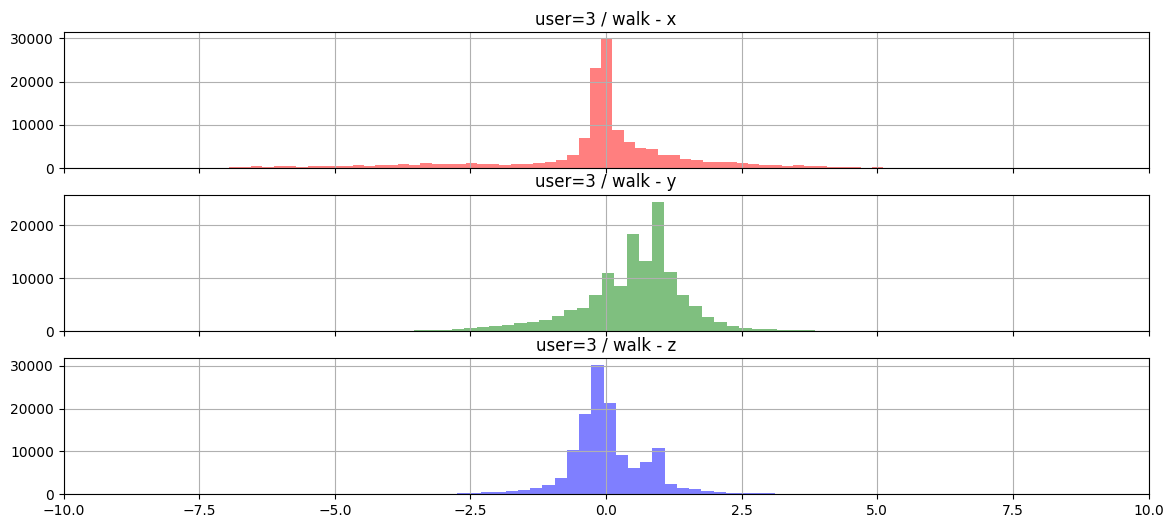

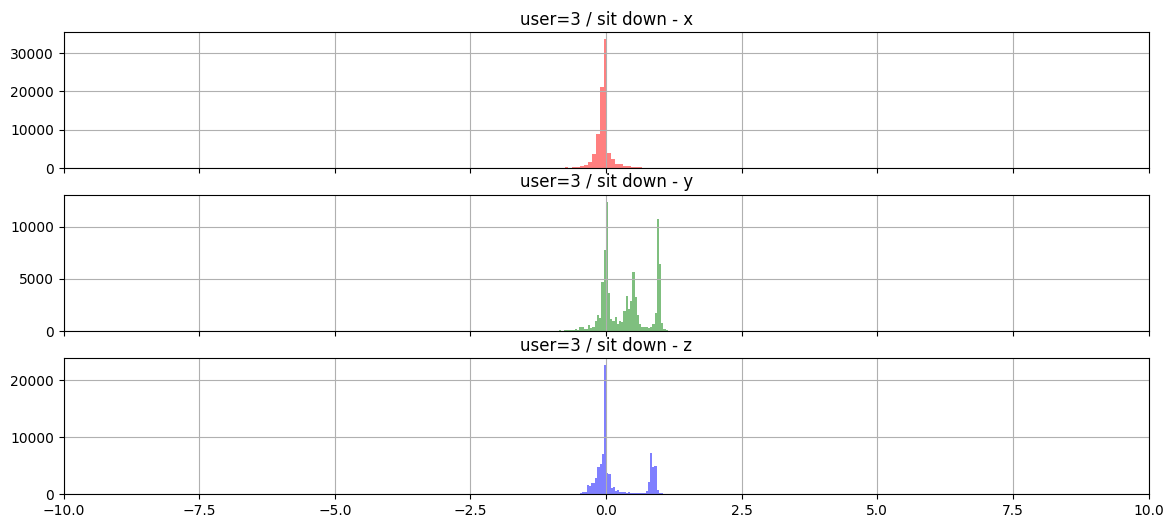

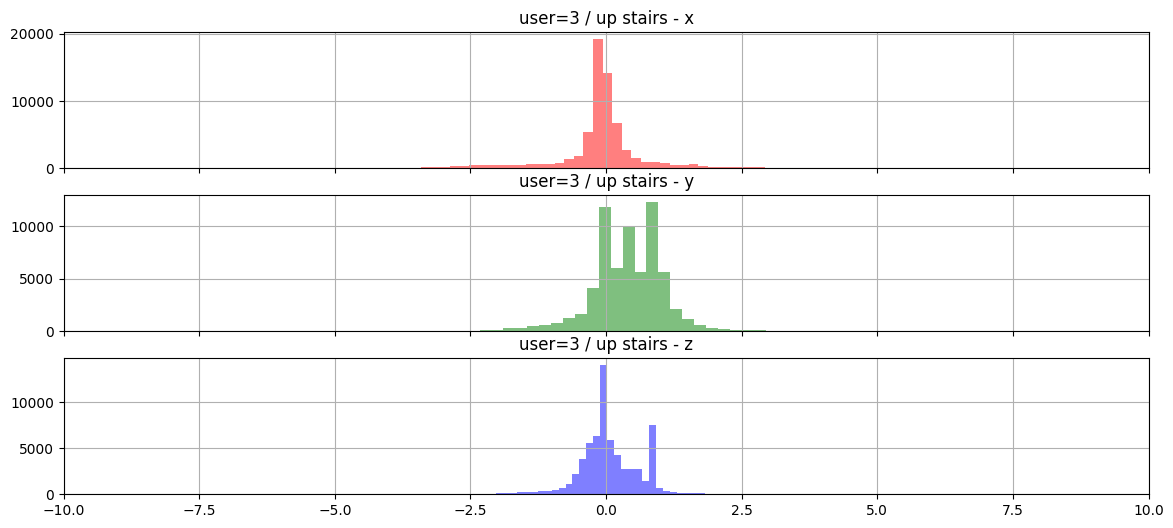

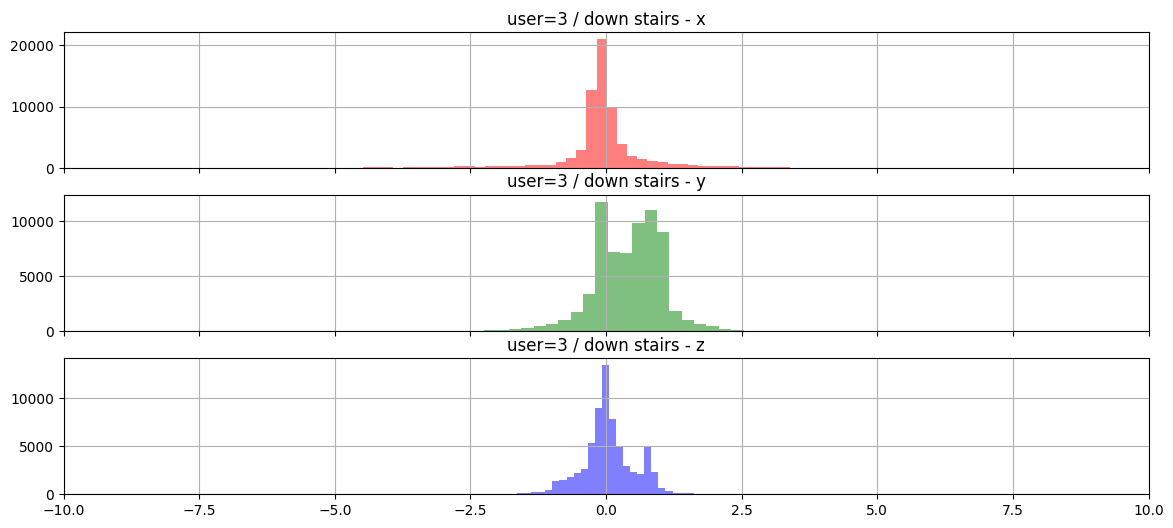

In [21]:
# distribution plots
n_bins = 100

for act in activities:
    df_temp = df_user.loc[df.type==act].copy()
    df_temp.reset_index(inplace=True)
    
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14,6), sharex=True)
    
    ax1.hist(df_temp['A-x'], bins=n_bins, color='red', alpha=0.5)
    ax1.set_xlim(-10,10)
    ax1.set_title('user=' + str(sel_user) + ' / ' + act + ' - x')
    ax1.grid()
    
    ax2.hist(df_temp['A-y'], bins=n_bins, color='green', alpha=0.5)
    ax2.set_xlim(-10,10)
    ax2.set_title('user=' + str(sel_user) + ' / ' + act + ' - y')
    ax2.grid()

    ax3.hist(df_temp['A-z'], bins=n_bins, color='blue', alpha=0.5)
    ax3.set_xlim(-10,10)
    ax3.set_title('user=' + str(sel_user) + ' / ' + act + ' - z')
    ax3.grid()
    
    plt.show()

Scatter Plots

walk :


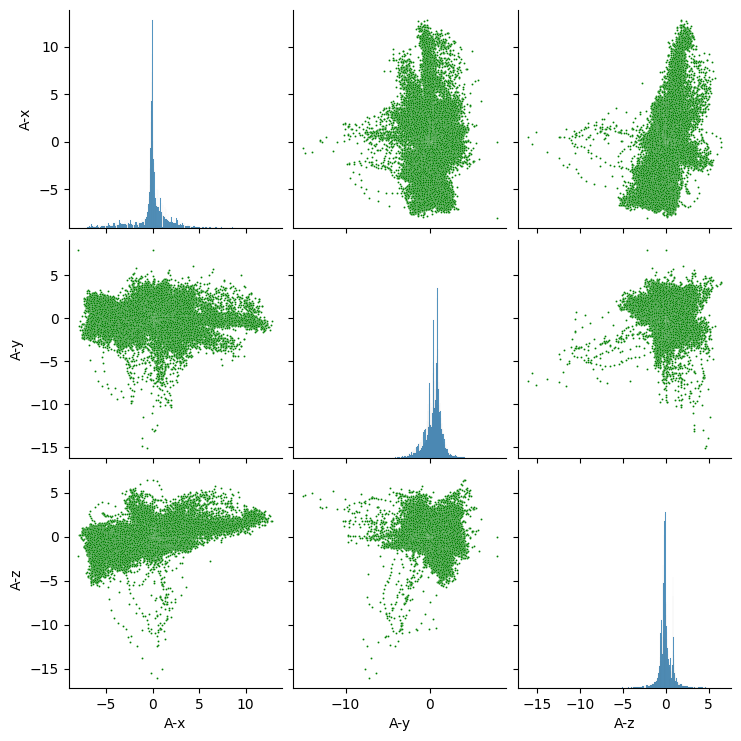

sit down :


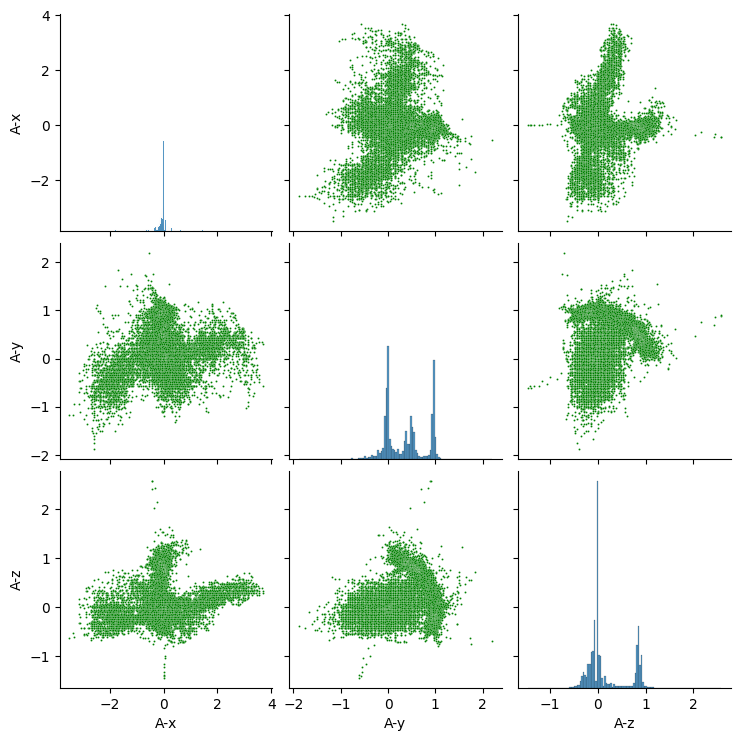

up stairs :


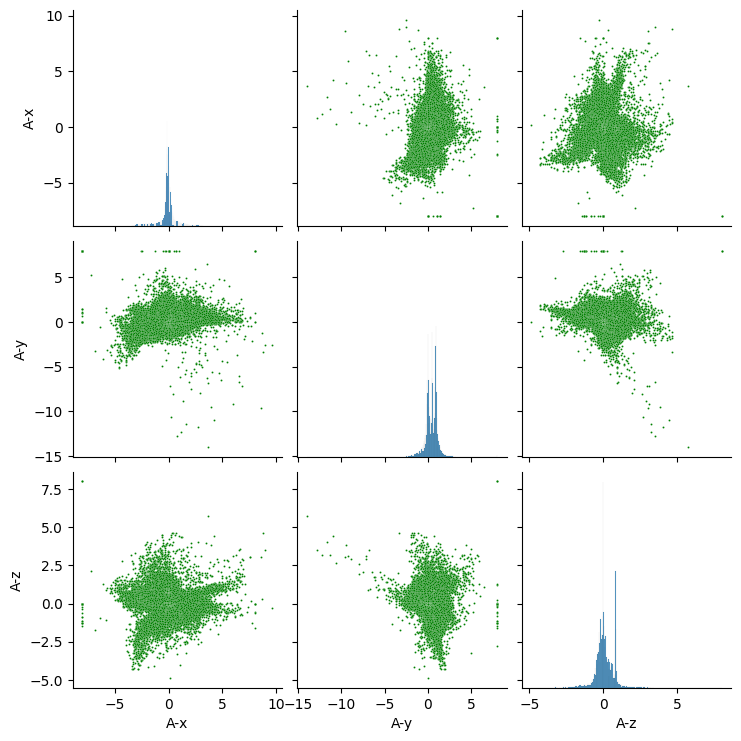

down stairs :


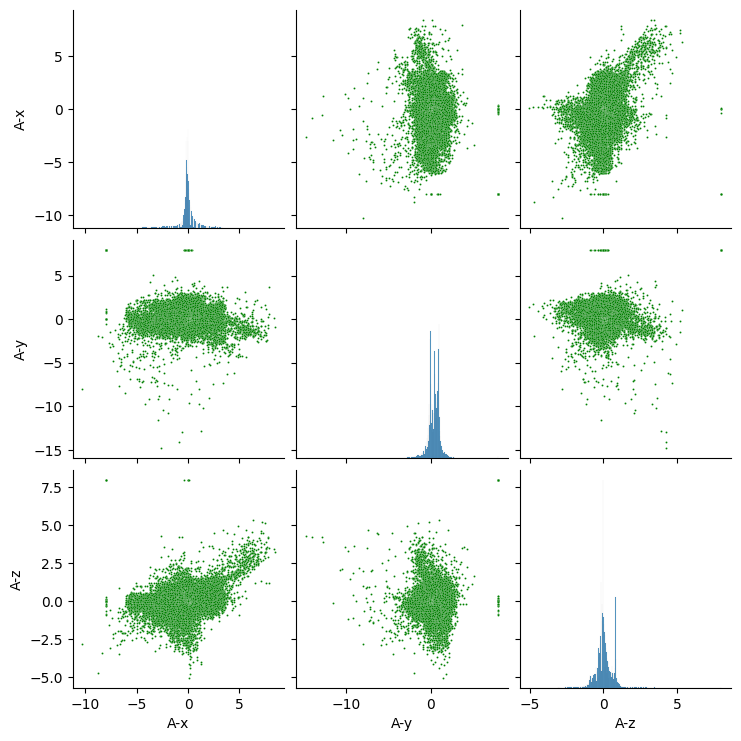

In [22]:
import seaborn as sns

# pairwise scatter plots
for act in activities:
    df_temp = df_user.loc[df.type==act].copy()
    df_temp.reset_index(inplace=True)
    
    # # convert time to seconds and start with 0
    # t_min = df_temp.timestamp.min()
    # df_temp['time_sec'] = (df_temp['timestamp'] - t_min)/1e9
    
    print(act,':')
    # 两两属性相关性
    # plot_kws：用于控制非对角线上的图的样式
    sns.pairplot(data = df_temp[['A-x','A-y','A-z']],
                 plot_kws = dict(s=2, color="g"))
    plt.show()

Standard deviation of accelerations by activitiy

In [20]:
stats_by_act = df_user.groupby('type')[['A-x','A-y','A-z']].std()
stats_by_act

,A-x,A-y,A-z
type,,,
down stairs,1.076427,0.739634,0.577948
sit down,0.436720,0.433471,0.414915
up stairs,0.977738,0.748823,0.616484
walk,2.049953,1.053150,0.846602


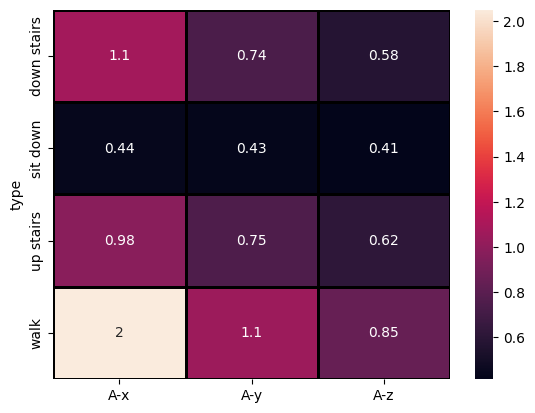

In [21]:
# and a more visual version
sns.heatmap(stats_by_act, annot=True, linewidths=1, linecolor='black')
plt.show()

All users

In [22]:
stats_full = df.groupby(['type','user'], 
                        as_index=False)[['A-x','A-y','A-z']].std()

In [67]:
# show full output
pd.set_option('display.max_rows', 200)
# stats_full

visualize each (user,activity)-pair in a 3D scatter plot:

In [27]:
import nbformat

# interactive 3d scatter plot
fig = px.scatter_3d(data_frame=stats_full,
                    x='A-x', y='A-y', z='A-z',
                    color='type',
                    opacity=0.25)
fig.update_layout(title='')
fig.show()

In [24]:
stats_full_mean_std = stats_full.groupby('type')[['A-x','A-y','A-z']].mean()
stats_full_mean_std

,A-x,A-y,A-z
type,,,
down stairs,1.310513,0.847224,0.620659
sit down,0.488920,0.437706,0.434661
up stairs,1.160630,0.863800,0.650810
walk,2.164132,1.166082,0.863112


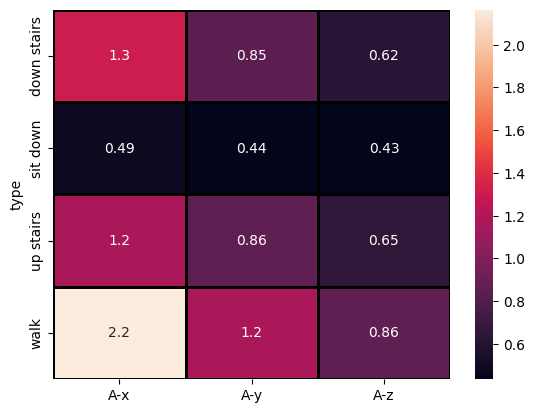

In [25]:
sns.heatmap(stats_full_mean_std,
            annot=True, linewidths=1, linecolor='black')
plt.show()

Feature Construction
- mean, squared_median, max, min, skewness and std for each segment

In [4]:
import numpy as np
from scipy import stats

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

label_encoder = LabelEncoder()

df = df.loc[df.activity=='Squat'].copy()
df['activity'] = df.activity + df.level
df['activity'] = label_encoder.fit_transform(df.activity)
df = df.sort_values(by = ['activity'], ignore_index=True)
df.drop(labels='user_id', axis=1, inplace=True)
df.drop(labels='level', axis=1, inplace=True)

df_train = df.iloc[df['num_seg'].values <= 7].copy()
df_test = df.iloc[df['num_seg'].values > 7].copy()

df_train.drop(labels='num_seg', axis=1, inplace=True)
df_test.drop(labels='num_seg', axis=1, inplace=True)

y_train = df_train['activity']
y_test = df_test['activity']
# y_train = label_encoder.fit_transform(df_train.activity)
# y_test = label_encoder.fit_transform(df_test.activity)

# df_train.activity = label_encoder.fit_transform(df_train.activity)
# df_test.activity = label_encoder.fit_transform(df_test.activity)

df_train.shape, df_test.shape

((56448, 5), (24192, 5))

In [5]:
# # train data -> Users upto User ID = 3 (i.e. 3 users)
# df_train = df[df['user'] <= 3]
# # test data -> Users ID = 4 (i.e. 1 users)
# df_test = df[df['user'] > 3]
from sklearn.model_selection import train_test_split

df_train ,df_test = train_test_split(df, test_size=0.3, random_state=42)

In [5]:
print(df_train.shape)
print(df_test.shape)

(56448, 5)
(24192, 5)


In [7]:
df_test.head(5)

,A-x,A-y,A-z,W-x,W-y,W-z,user,type
616555,1.5533,3.4557,1.2566,0.0781,0.8242,-0.2383,2,walk
329344,0.4453,2.0820,-0.8750,-0.8901,0.8377,-1.1344,2,down stairs
405896,-0.2695,0.6289,0.7578,0.1571,-0.0698,0.0698,2,walk
803910,-0.0391,0.4648,0.8516,-0.0175,-0.0175,0.0000,3,sit down
409306,-4.8868,0.0698,-4.1015,0.0156,1.0352,-0.0664,2,walk


In [69]:
# from scipy import stats

# test_label = stats.mode(df_test['type'][0: 0 + 96])[0][0]

In [70]:
# test_label

In [71]:
# test_label[0][0]

In [8]:
df_train.head(5)

,A-x,A-y,A-z,W-x,W-y,W-z,user,type
345960,0.0000,0.5547,0.7500,-0.0524,-0.0698,0.0524,2,sit down
1091685,0.2967,-2.2514,-0.4363,-0.1680,1.3125,-0.4063,4,walk
852854,-5.9166,1.1868,-3.0368,0.1016,0.8945,-0.1680,3,walk
320398,-0.9414,0.7578,0.8867,-1.8849,-0.3840,0.0698,2,up stairs
1312864,0.9425,0.4887,-0.0698,0.1289,0.5547,0.7891,4,walk


In [9]:
df_test.head(5)

,A-x,A-y,A-z,W-x,W-y,W-z,user,type
616555,1.5533,3.4557,1.2566,0.0781,0.8242,-0.2383,2,walk
329344,0.4453,2.0820,-0.8750,-0.8901,0.8377,-1.1344,2,down stairs
405896,-0.2695,0.6289,0.7578,0.1571,-0.0698,0.0698,2,walk
803910,-0.0391,0.4648,0.8516,-0.0175,-0.0175,0.0000,3,sit down
409306,-4.8868,0.0698,-4.1015,0.0156,1.0352,-0.0664,2,walk


In [6]:
df_train.reset_index(drop=True, inplace=True) 
df_test.reset_index(drop=True, inplace=True) 

In [74]:
# df_test.reset_index().head(5)

In [75]:
# df_test.drop(labels='index', axis=1, inplace=True)

In [7]:
df_test.head(5)

,amplitude1,amplitude2,amplitude4,amplitude5,activity
0,0.018966,0.008176,0.019680,0.011294,0
1,0.018900,0.007948,0.016557,0.009685,0
2,0.018853,0.007890,0.013232,0.007062,0
3,0.019052,0.008610,0.011616,0.005160,0
4,0.019400,0.010037,0.012013,0.005207,0


construct train set features

In [8]:
from scipy import stats
from scipy.signal import find_peaks
import warnings

In [11]:
x_list = []
y_list = []
z_list = []
wx_list = []
wy_list = []
wz_list = []
train_labels = []
# test_labels = []

window_size = length
step_size = length # 50% overlaped

# creating overlaping windows of size window-size 100
for i in range(0, df_train.shape[0] - window_size, step_size):
    # A
    xs = df_train['A-x'].values[i: i + 96]
    ys = df_train['A-y'].values[i: i + 96]
    zs = df_train['A-z'].values[i: i + 96]
    # W
    W_xs = df_train['W-x'].values[i: i + 96]
    W_ys = df_train['W-y'].values[i: i + 96]
    W_zs = df_train['W-z'].values[i: i + 96]
    train_label = stats.mode(df_train['type'][i: i + 96])[0][0]

    x_list.append(xs)
    y_list.append(ys)
    z_list.append(zs)
    wx_list.append(W_xs)
    wy_list.append(W_ys)
    wz_list.append(W_zs)
    train_labels.append(train_label)

# Statistical Features on raw x, y and z in time domain
X_train = pd.DataFrame()

# mean
X_train['x_mean'] = pd.Series(x_list).apply(lambda x: x.mean())
X_train['y_mean'] = pd.Series(y_list).apply(lambda x: x.mean())
X_train['z_mean'] = pd.Series(z_list).apply(lambda x: x.mean())
X_train['wx_mean'] = pd.Series(wx_list).apply(lambda x: x.mean())
X_train['wy_mean'] = pd.Series(wy_list).apply(lambda x: x.mean())
X_train['wz_mean'] = pd.Series(wz_list).apply(lambda x: x.mean())

# std dev
X_train['x_std'] = pd.Series(x_list).apply(lambda x: x.std())
X_train['y_std'] = pd.Series(y_list).apply(lambda x: x.std())
X_train['z_std'] = pd.Series(z_list).apply(lambda x: x.std())
X_train['wx_std'] = pd.Series(wx_list).apply(lambda x: x.std())
X_train['wy_std'] = pd.Series(wy_list).apply(lambda x: x.std())
X_train['wz_std'] = pd.Series(wz_list).apply(lambda x: x.std())

# avg absolute diff
X_train['x_aad'] = pd.Series(x_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['y_aad'] = pd.Series(y_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['z_aad'] = pd.Series(z_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['wx_aad'] = pd.Series(wx_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['wy_aad'] = pd.Series(wy_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['wz_aad'] = pd.Series(wz_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# min
X_train['x_min'] = pd.Series(x_list).apply(lambda x: x.min())
X_train['y_min'] = pd.Series(y_list).apply(lambda x: x.min())
X_train['z_min'] = pd.Series(z_list).apply(lambda x: x.min())
X_train['wx_min'] = pd.Series(wx_list).apply(lambda x: x.min())
X_train['wy_min'] = pd.Series(wy_list).apply(lambda x: x.min())
X_train['wz_min'] = pd.Series(wz_list).apply(lambda x: x.min())

# max
X_train['x_max'] = pd.Series(x_list).apply(lambda x: x.max())
X_train['y_max'] = pd.Series(y_list).apply(lambda x: x.max())
X_train['z_max'] = pd.Series(z_list).apply(lambda x: x.max())
X_train['wx_max'] = pd.Series(wx_list).apply(lambda x: x.max())
X_train['wy_max'] = pd.Series(wy_list).apply(lambda x: x.max())
X_train['wz_max'] = pd.Series(wz_list).apply(lambda x: x.max())


# max-min diff
X_train['x_maxmin_diff'] = X_train['x_max'] - X_train['x_min']
X_train['y_maxmin_diff'] = X_train['y_max'] - X_train['y_min']
X_train['z_maxmin_diff'] = X_train['z_max'] - X_train['z_min']
X_train['wx_maxmin_diff'] = X_train['wx_max'] - X_train['wx_min']
X_train['wy_maxmin_diff'] = X_train['wy_max'] - X_train['wy_min']
X_train['wz_maxmin_diff'] = X_train['wz_max'] - X_train['wz_min']

# median
X_train['x_median'] = pd.Series(x_list).apply(lambda x: np.median(x))
X_train['y_median'] = pd.Series(y_list).apply(lambda x: np.median(x))
X_train['z_median'] = pd.Series(z_list).apply(lambda x: np.median(x))
X_train['wx_median'] = pd.Series(wx_list).apply(lambda x: np.median(x))
X_train['wy_median'] = pd.Series(wy_list).apply(lambda x: np.median(x))
X_train['wz_median'] = pd.Series(wz_list).apply(lambda x: np.median(x))

# median abs dev 
X_train['x_mad'] = pd.Series(x_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['y_mad'] = pd.Series(y_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['z_mad'] = pd.Series(z_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['wx_mad'] = pd.Series(wx_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['wy_mad'] = pd.Series(wy_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['wz_mad'] = pd.Series(wz_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# interquartile range
X_train['x_IQR'] = pd.Series(x_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['y_IQR'] = pd.Series(y_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['z_IQR'] = pd.Series(z_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['wx_IQR'] = pd.Series(wx_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['wy_IQR'] = pd.Series(wy_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['wz_IQR'] = pd.Series(wz_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# negtive count
X_train['x_neg_count'] = pd.Series(x_list).apply(lambda x: np.sum(x < 0))
X_train['y_neg_count'] = pd.Series(y_list).apply(lambda x: np.sum(x < 0))
X_train['z_neg_count'] = pd.Series(z_list).apply(lambda x: np.sum(x < 0))
X_train['wx_neg_count'] = pd.Series(wx_list).apply(lambda x: np.sum(x < 0))
X_train['wy_neg_count'] = pd.Series(wy_list).apply(lambda x: np.sum(x < 0))
X_train['wz_neg_count'] = pd.Series(wz_list).apply(lambda x: np.sum(x < 0))

# positive count
X_train['x_pos_count'] = pd.Series(x_list).apply(lambda x: np.sum(x > 0))
X_train['y_pos_count'] = pd.Series(y_list).apply(lambda x: np.sum(x > 0))
X_train['z_pos_count'] = pd.Series(z_list).apply(lambda x: np.sum(x > 0))
X_train['wx_pos_count'] = pd.Series(wx_list).apply(lambda x: np.sum(x > 0))
X_train['wy_pos_count'] = pd.Series(wy_list).apply(lambda x: np.sum(x > 0))
X_train['wz_pos_count'] = pd.Series(wz_list).apply(lambda x: np.sum(x > 0))

# values above mean
X_train['x_above_mean'] = pd.Series(x_list).apply(lambda x: np.sum(x > x.mean()))
X_train['y_above_mean'] = pd.Series(y_list).apply(lambda x: np.sum(x > x.mean()))
X_train['z_above_mean'] = pd.Series(z_list).apply(lambda x: np.sum(x > x.mean()))
X_train['wx_above_mean'] = pd.Series(wx_list).apply(lambda x: np.sum(x > x.mean()))
X_train['wy_above_mean'] = pd.Series(wy_list).apply(lambda x: np.sum(x > x.mean()))
X_train['wz_above_mean'] = pd.Series(wz_list).apply(lambda x: np.sum(x > x.mean()))

# number of peaks
X_train['x_peak_count'] = pd.Series(x_list).apply(lambda x: len(find_peaks(x)[0]))
X_train['y_peak_count'] = pd.Series(y_list).apply(lambda x: len(find_peaks(x)[0]))
X_train['z_peak_count'] = pd.Series(z_list).apply(lambda x: len(find_peaks(x)[0]))
X_train['wx_peak_count'] = pd.Series(wx_list).apply(lambda x: len(find_peaks(x)[0]))
X_train['wy_peak_count'] = pd.Series(wy_list).apply(lambda x: len(find_peaks(x)[0]))
X_train['wz_peak_count'] = pd.Series(wz_list).apply(lambda x: len(find_peaks(x)[0]))

# skewness
X_train['x_skewness'] = pd.Series(x_list).apply(lambda x: stats.skew(x))
X_train['y_skewness'] = pd.Series(y_list).apply(lambda x: stats.skew(x))
X_train['z_skewness'] = pd.Series(z_list).apply(lambda x: stats.skew(x))
X_train['wx_skewness'] = pd.Series(wx_list).apply(lambda x: stats.skew(x))
X_train['wy_skewness'] = pd.Series(wy_list).apply(lambda x: stats.skew(x))
X_train['wz_skewness'] = pd.Series(wz_list).apply(lambda x: stats.skew(x))

# kurtosis
X_train['x_kurtosis'] = pd.Series(x_list).apply(lambda x: stats.kurtosis(x))
X_train['y_kurtosis'] = pd.Series(y_list).apply(lambda x: stats.kurtosis(x))
X_train['z_kurtosis'] = pd.Series(z_list).apply(lambda x: stats.kurtosis(x))
X_train['wx_kurtosis'] = pd.Series(wx_list).apply(lambda x: stats.kurtosis(x))
X_train['wy_kurtosis'] = pd.Series(wy_list).apply(lambda x: stats.kurtosis(x))
X_train['wz_kurtosis'] = pd.Series(wz_list).apply(lambda x: stats.kurtosis(x))

# energy
X_train['x_energy'] = pd.Series(x_list).apply(lambda x: np.sum(x**2)/96)
X_train['y_energy'] = pd.Series(y_list).apply(lambda x: np.sum(x**2)/96)
X_train['z_energy'] = pd.Series(z_list).apply(lambda x: np.sum(x**2)/96)
X_train['wx_energy'] = pd.Series(wx_list).apply(lambda x: np.sum(x**2)/96)
X_train['wy_energy'] = pd.Series(wy_list).apply(lambda x: np.sum(x**2)/96)
X_train['wz_energy'] = pd.Series(wz_list).apply(lambda x: np.sum(x**2)/96)

# avg resultant
X_train['avg_result_accl'] = [i.mean() for i in ((pd.Series(x_list)**2 + pd.Series(y_list)**2 + pd.Series(z_list)**2)**0.5)]
X_train['W_avg_result_accl'] = [i.mean() for i in ((pd.Series(wx_list)**2 + pd.Series(wy_list)**2 + pd.Series(wz_list)**2)**0.5)]

# signal magnitude area
X_train['sma'] =    pd.Series(x_list).apply(lambda x: np.sum(abs(x)/96)) + pd.Series(y_list).apply(lambda x: np.sum(abs(x)/96)) \
                  + pd.Series(z_list).apply(lambda x: np.sum(abs(x)/96))
X_train['W_sma'] =    pd.Series(wx_list).apply(lambda x: np.sum(abs(x)/96)) + pd.Series(wy_list).apply(lambda x: np.sum(abs(x)/96)) \
                  + pd.Series(wz_list).apply(lambda x: np.sum(abs(x)/96))

C:\Users\Lee\AppData\Local\Temp\ipykernel_7608\5314062.py:23: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  train_label = stats.mode(df_train['type'][i: i + 96])[0][0]
C:\Users\Lee\AppData\Local\Temp\ipykernel_7608\5314062.py:23: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  train_label = stats.mode(df_train['type'][i: i + 96])[0][0]
C:\Users\Lee\AppData\Local\Temp\ipyker

In [12]:
X_train.head(5)

,x_mean,y_mean,z_mean,wx_mean,wy_mean,wz_mean,x_std,y_std,z_std,wx_std,...,x_energy,y_energy,z_energy,wx_energy,wy_energy,wz_energy,avg_result_accl,W_avg_result_accl,sma,W_sma
0,-0.096014,0.463276,0.111747,0.049959,0.535024,-0.032621,1.349621,0.906605,0.712656,1.003710,...,1.830695,1.036557,0.520366,1.009929,0.940917,0.229281,1.309084,1.126349,1.868307,1.530896
1,-0.016354,0.549190,0.137496,0.194374,0.586255,0.029582,1.413382,0.833667,0.588421,0.948576,...,1.997917,0.996611,0.365144,0.937578,1.012199,0.253699,1.300152,1.171683,1.837456,1.632266
2,0.252358,0.534373,0.124256,0.007133,0.372779,0.093226,1.757787,0.904522,0.800928,1.040678,...,3.153499,1.103715,0.656926,1.083061,1.025515,0.345254,1.580308,1.259835,2.227248,1.784520
3,-0.120165,0.474731,0.018235,-0.132952,0.288719,0.092222,1.890384,0.935813,0.760304,1.097292,...,3.587991,1.101116,0.578394,1.221726,0.864440,0.357011,1.577270,1.226120,2.181515,1.703659
4,-0.295073,0.427285,0.005847,-0.102019,0.493035,0.089621,1.491651,1.149307,0.583395,1.850106,...,2.312091,1.503480,0.340383,3.433300,1.526647,0.472935,1.380063,1.527690,1.903547,2.062775


In [16]:
X_train.shape

(20911, 100)

In [10]:
pd.isna(X_train).sum()

x_mean               0
y_mean               0
z_mean               0
wx_mean              0
wy_mean              0
                    ..
wz_energy            0
avg_result_accl      0
W_avg_result_accl    0
sma                  0
W_sma                0
Length: 100, dtype: int64

In [18]:
X_train.columns.value_counts()

x_mean           1
wx_pos_count     1
y_peak_count     1
x_peak_count     1
wz_above_mean    1
                ..
x_maxmin_diff    1
wz_max           1
wy_max           1
wx_max           1
W_sma            1
Length: 100, dtype: int64

d:\python\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


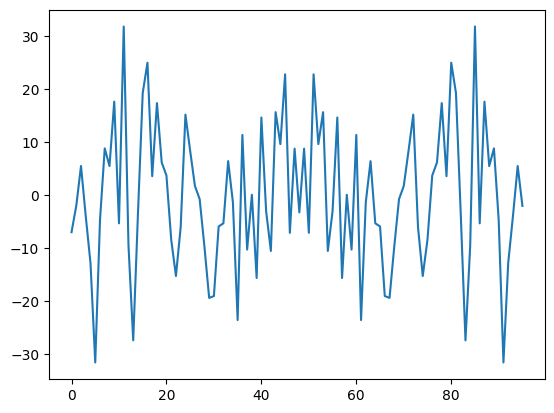

In [13]:
pd.Series(np.fft.fft(pd.Series(x_list)[36])).plot()
plt.show()

In [14]:
# converting the signals from time domain to frequency domain using FFT
x_list_fft = pd.Series(x_list).apply(lambda x: np.abs(np.fft.fft(x))[1:49])
y_list_fft = pd.Series(y_list).apply(lambda x: np.abs(np.fft.fft(x))[1:49])
z_list_fft = pd.Series(z_list).apply(lambda x: np.abs(np.fft.fft(x))[1:49])
W_x_list_fft = pd.Series(wx_list).apply(lambda x: np.abs(np.fft.fft(x))[1:49])
W_y_list_fft = pd.Series(wy_list).apply(lambda x: np.abs(np.fft.fft(x))[1:49])
W_z_list_fft = pd.Series(wz_list).apply(lambda x: np.abs(np.fft.fft(x))[1:49])

# Statistical Features on raw x, y and z in frequency domain
# FFT mean
X_train['x_mean_fft'] = pd.Series(x_list_fft).apply(lambda x: x.mean())
X_train['y_mean_fft'] = pd.Series(y_list_fft).apply(lambda x: x.mean())
X_train['z_mean_fft'] = pd.Series(z_list_fft).apply(lambda x: x.mean())
X_train['W_x_mean_fft'] = pd.Series(W_x_list_fft).apply(lambda x: x.mean())
X_train['W_y_mean_fft'] = pd.Series(W_y_list_fft).apply(lambda x: x.mean())
X_train['W_z_mean_fft'] = pd.Series(W_z_list_fft).apply(lambda x: x.mean())

# FFT std dev
X_train['x_std_fft'] = pd.Series(x_list_fft).apply(lambda x: x.std())
X_train['y_std_fft'] = pd.Series(y_list_fft).apply(lambda x: x.std())
X_train['z_std_fft'] = pd.Series(z_list_fft).apply(lambda x: x.std())
X_train['W_x_std_fft'] = pd.Series(W_x_list_fft).apply(lambda x: x.std())
X_train['W_y_std_fft'] = pd.Series(W_y_list_fft).apply(lambda x: x.std())
X_train['W_z_std_fft'] = pd.Series(W_z_list_fft).apply(lambda x: x.std())

# FFT avg absolute diff
X_train['x_aad_fft'] = pd.Series(x_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['y_aad_fft'] = pd.Series(y_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['z_aad_fft'] = pd.Series(z_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['W_x_aad_fft'] = pd.Series(W_x_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['W_y_aad_fft'] = pd.Series(W_y_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['W_z_aad_fft'] = pd.Series(W_z_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# FFT min
X_train['x_min_fft'] = pd.Series(x_list_fft).apply(lambda x: x.min())
X_train['y_min_fft'] = pd.Series(y_list_fft).apply(lambda x: x.min())
X_train['z_min_fft'] = pd.Series(z_list_fft).apply(lambda x: x.min())
X_train['W_x_min_fft'] = pd.Series(W_x_list_fft).apply(lambda x: x.min())
X_train['W_y_min_fft'] = pd.Series(W_y_list_fft).apply(lambda x: x.min())
X_train['W_z_min_fft'] = pd.Series(W_z_list_fft).apply(lambda x: x.min())

# FFT max
X_train['x_max_fft'] = pd.Series(x_list_fft).apply(lambda x: x.max())
X_train['y_max_fft'] = pd.Series(y_list_fft).apply(lambda x: x.max())
X_train['z_max_fft'] = pd.Series(z_list_fft).apply(lambda x: x.max())
X_train['W_x_max_fft'] = pd.Series(W_x_list_fft).apply(lambda x: x.max())
X_train['W_y_max_fft'] = pd.Series(W_y_list_fft).apply(lambda x: x.max())
X_train['W_z_max_fft'] = pd.Series(W_z_list_fft).apply(lambda x: x.max())

# FFT max-min diff
X_train['x_maxmin_diff_fft'] = X_train['x_max_fft'] - X_train['x_min_fft']
X_train['y_maxmin_diff_fft'] = X_train['y_max_fft'] - X_train['y_min_fft']
X_train['z_maxmin_diff_fft'] = X_train['z_max_fft'] - X_train['z_min_fft']
X_train['W_x_maxmin_diff_fft'] = X_train['W_x_max_fft'] - X_train['W_x_min_fft']
X_train['W_y_maxmin_diff_fft'] = X_train['W_y_max_fft'] - X_train['W_y_min_fft']
X_train['W_z_maxmin_diff_fft'] = X_train['W_z_max_fft'] - X_train['W_z_min_fft']

# FFT median
X_train['x_median_fft'] = pd.Series(x_list_fft).apply(lambda x: np.median(x))
X_train['y_median_fft'] = pd.Series(y_list_fft).apply(lambda x: np.median(x))
X_train['z_median_fft'] = pd.Series(z_list_fft).apply(lambda x: np.median(x))
X_train['W_x_median_fft'] = pd.Series(W_x_list_fft).apply(lambda x: np.median(x))
X_train['W_y_median_fft'] = pd.Series(W_y_list_fft).apply(lambda x: np.median(x))
X_train['W_z_median_fft'] = pd.Series(W_z_list_fft).apply(lambda x: np.median(x))

# FFT median abs dev 
X_train['x_mad_fft'] = pd.Series(x_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['y_mad_fft'] = pd.Series(y_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['z_mad_fft'] = pd.Series(z_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['W_x_mad_fft'] = pd.Series(W_x_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['W_y_mad_fft'] = pd.Series(W_y_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['W_z_mad_fft'] = pd.Series(W_z_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# FFT Interquartile range 找到一组数的分位数值，如四分位数等(具体什么位置根据自己定义)
X_train['x_IQR_fft'] = pd.Series(x_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['y_IQR_fft'] = pd.Series(y_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['z_IQR_fft'] = pd.Series(z_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['W_x_IQR_fft'] = pd.Series(W_x_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['W_y_IQR_fft'] = pd.Series(W_y_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['W_z_IQR_fft'] = pd.Series(W_z_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# FFT values above mean
X_train['x_above_mean_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(x > x.mean()))
X_train['y_above_mean_fft'] = pd.Series(y_list_fft).apply(lambda x: np.sum(x > x.mean()))
X_train['z_above_mean_fft'] = pd.Series(z_list_fft).apply(lambda x: np.sum(x > x.mean()))
X_train['W_x_above_mean_fft'] = pd.Series(W_x_list_fft).apply(lambda x: np.sum(x > x.mean()))
X_train['W_y_above_mean_fft'] = pd.Series(W_y_list_fft).apply(lambda x: np.sum(x > x.mean()))
X_train['W_z_above_mean_fft'] = pd.Series(W_z_list_fft).apply(lambda x: np.sum(x > x.mean()))

# FFT number of peaks
X_train['x_peak_count_fft'] = pd.Series(x_list_fft).apply(lambda x: len(find_peaks(x)[0]))
X_train['y_peak_count_fft'] = pd.Series(y_list_fft).apply(lambda x: len(find_peaks(x)[0]))
X_train['z_peak_count_fft'] = pd.Series(z_list_fft).apply(lambda x: len(find_peaks(x)[0]))
X_train['W_x_peak_count_fft'] = pd.Series(W_x_list_fft).apply(lambda x: len(find_peaks(x)[0]))
X_train['W_y_peak_count_fft'] = pd.Series(W_y_list_fft).apply(lambda x: len(find_peaks(x)[0]))
X_train['W_z_peak_count_fft'] = pd.Series(W_z_list_fft).apply(lambda x: len(find_peaks(x)[0]))

# FFT skewness
X_train['x_skewness_fft'] = pd.Series(x_list_fft).apply(lambda x: stats.skew(x))
X_train['y_skewness_fft'] = pd.Series(y_list_fft).apply(lambda x: stats.skew(x))
X_train['z_skewness_fft'] = pd.Series(z_list_fft).apply(lambda x: stats.skew(x))
X_train['W_x_skewness_fft'] = pd.Series(W_x_list_fft).apply(lambda x: stats.skew(x))
X_train['W_y_skewness_fft'] = pd.Series(W_y_list_fft).apply(lambda x: stats.skew(x))
X_train['W_z_skewness_fft'] = pd.Series(W_z_list_fft).apply(lambda x: stats.skew(x))

# FFT kurtosis
X_train['x_kurtosis_fft'] = pd.Series(x_list_fft).apply(lambda x: stats.kurtosis(x))
X_train['y_kurtosis_fft'] = pd.Series(y_list_fft).apply(lambda x: stats.kurtosis(x))
X_train['z_kurtosis_fft'] = pd.Series(z_list_fft).apply(lambda x: stats.kurtosis(x))
X_train['W_x_kurtosis_fft'] = pd.Series(W_x_list_fft).apply(lambda x: stats.kurtosis(x))
X_train['W_y_kurtosis_fft'] = pd.Series(W_y_list_fft).apply(lambda x: stats.kurtosis(x))
X_train['W_z_kurtosis_fft'] = pd.Series(W_z_list_fft).apply(lambda x: stats.kurtosis(x))

# FFT energy
X_train['x_energy_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(x**2)/48)
X_train['y_energy_fft'] = pd.Series(y_list_fft).apply(lambda x: np.sum(x**2)/48)
X_train['z_energy_fft'] = pd.Series(z_list_fft).apply(lambda x: np.sum(x**2)/48)
X_train['W_x_energy_fft'] = pd.Series(W_x_list_fft).apply(lambda x: np.sum(x**2)/48)
X_train['W_y_energy_fft'] = pd.Series(W_y_list_fft).apply(lambda x: np.sum(x**2)/48)
X_train['W_z_energy_fft'] = pd.Series(W_z_list_fft).apply(lambda x: np.sum(x**2)/48)

# FFT avg resultant
X_train['avg_result_accl_fft'] = [i.mean() for i in ((pd.Series(x_list_fft)**2 + pd.Series(y_list_fft)**2 + pd.Series(z_list_fft)**2)**0.5)]
X_train['W_avg_result_accl_fft'] = [i.mean() for i in ((pd.Series(W_x_list_fft)**2 + pd.Series(W_y_list_fft)**2 + pd.Series(W_z_list_fft)**2)**0.5)]

# FFT Signal magnitude area
X_train['sma_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(abs(x)/48)) + pd.Series(y_list_fft).apply(lambda x: np.sum(abs(x)/48)) \
                     + pd.Series(z_list_fft).apply(lambda x: np.sum(abs(x)/48))
X_train['W_sma_fft'] = pd.Series(W_x_list_fft).apply(lambda x: np.sum(abs(x)/48)) + pd.Series(W_y_list_fft).apply(lambda x: np.sum(abs(x)/48)) \
                     + pd.Series(W_z_list_fft).apply(lambda x: np.sum(abs(x)/48))

# 共100+14*6+2*2=188个特征 相比时域少了第10，11个特征（负值计数，正值计数）
print(X_train.shape) # (20911, 188)

C:\Users\Lee\AppData\Local\Temp\ipykernel_7608\2080110336.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train['x_mean_fft'] = pd.Series(x_list_fft).apply(lambda x: x.mean())
C:\Users\Lee\AppData\Local\Temp\ipykernel_7608\2080110336.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train['y_mean_fft'] = pd.Series(y_list_fft).apply(lambda x: x.mean())
C:\Users\Lee\AppData\Local\Temp\ipykernel_7608\2080110336.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inser

(19724, 188)


C:\Users\Lee\AppData\Local\Temp\ipykernel_7608\2080110336.py:129: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train['W_sma_fft'] = pd.Series(W_x_list_fft).apply(lambda x: np.sum(abs(x)/48)) + pd.Series(W_y_list_fft).apply(lambda x: np.sum(abs(x)/48)) \


In [25]:
X_train.duplicated().sum()

0

In [26]:
X_train.T.duplicated().sum()

0

In [26]:
pd.isna(X_train).sum()

x_mean                 0
y_mean                 0
z_mean                 0
x_std                  0
y_std                  0
                      ..
x_energy_fft           0
y_energy_fft           0
z_energy_fft           0
avg_result_accl_fft    0
sma_fft                0
Length: 94, dtype: int64

In [27]:
import pandas as pd
from scipy import stats

x_list_fft_test = [[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]]
result = pd.Series(x_list_fft_test).apply(lambda x: stats.skew(x), args=())
print(result)

0    0.0
1    0.0
2    0.0
dtype: float64


In [15]:
# Max Indices and Min indices 

# index of max value in time domain
X_train['x_argmax'] = pd.Series(x_list).apply(lambda x: np.argmax(x))
X_train['y_argmax'] = pd.Series(y_list).apply(lambda x: np.argmax(x))
X_train['z_argmax'] = pd.Series(z_list).apply(lambda x: np.argmax(x))
X_train['W_x_argmax'] = pd.Series(wx_list).apply(lambda x: np.argmax(x))
X_train['W_y_argmax'] = pd.Series(wy_list).apply(lambda x: np.argmax(x))
X_train['W_z_argmax'] = pd.Series(wz_list).apply(lambda x: np.argmax(x))

# index of min value in time domain
X_train['x_argmin'] = pd.Series(x_list).apply(lambda x: np.argmin(x))
X_train['y_argmin'] = pd.Series(y_list).apply(lambda x: np.argmin(x))
X_train['z_argmin'] = pd.Series(z_list).apply(lambda x: np.argmin(x))
X_train['W_x_argmin'] = pd.Series(wx_list).apply(lambda x: np.argmin(x))
X_train['W_y_argmin'] = pd.Series(wy_list).apply(lambda x: np.argmin(x))
X_train['W_z_argmin'] = pd.Series(wz_list).apply(lambda x: np.argmin(x))

# absolute difference between above indices
X_train['x_arg_diff'] = abs(X_train['x_argmax'] - X_train['x_argmin'])
X_train['y_arg_diff'] = abs(X_train['y_argmax'] - X_train['y_argmin'])
X_train['z_arg_diff'] = abs(X_train['z_argmax'] - X_train['z_argmin'])
X_train['W_x_arg_diff'] = abs(X_train['W_x_argmax'] - X_train['W_x_argmin'])
X_train['W_y_arg_diff'] = abs(X_train['W_y_argmax'] - X_train['W_y_argmin'])
X_train['W_z_arg_diff'] = abs(X_train['W_z_argmax'] - X_train['W_z_argmin'])

# index of max value in frequency domain
X_train['x_argmax_fft'] = pd.Series(x_list_fft).apply(lambda x: np.argmax(np.abs(np.fft.fft(x))[1:50]))
X_train['y_argmax_fft'] = pd.Series(y_list_fft).apply(lambda x: np.argmax(np.abs(np.fft.fft(x))[1:50]))
X_train['z_argmax_fft'] = pd.Series(z_list_fft).apply(lambda x: np.argmax(np.abs(np.fft.fft(x))[1:50]))
X_train['W_x_argmax_fft'] = pd.Series(W_x_list_fft).apply(lambda x: np.argmax(np.abs(np.fft.fft(x))[1:50]))
X_train['W_y_argmax_fft'] = pd.Series(W_y_list_fft).apply(lambda x: np.argmax(np.abs(np.fft.fft(x))[1:50]))
X_train['W_z_argmax_fft'] = pd.Series(W_z_list_fft).apply(lambda x: np.argmax(np.abs(np.fft.fft(x))[1:50]))

# index of min value in frequency domain
X_train['x_argmin_fft'] = pd.Series(x_list_fft).apply(lambda x: np.argmin(np.abs(np.fft.fft(x))[1:50]))
X_train['y_argmin_fft'] = pd.Series(y_list_fft).apply(lambda x: np.argmin(np.abs(np.fft.fft(x))[1:50]))
X_train['z_argmin_fft'] = pd.Series(z_list_fft).apply(lambda x: np.argmin(np.abs(np.fft.fft(x))[1:50]))
X_train['W_x_argmin_fft'] = pd.Series(W_x_list_fft).apply(lambda x: np.argmin(np.abs(np.fft.fft(x))[1:50]))
X_train['W_y_argmin_fft'] = pd.Series(W_y_list_fft).apply(lambda x: np.argmin(np.abs(np.fft.fft(x))[1:50]))
X_train['W_z_argmin_fft'] = pd.Series(W_z_list_fft).apply(lambda x: np.argmin(np.abs(np.fft.fft(x))[1:50]))

# absolute difference between above indices
X_train['x_arg_diff_fft'] = abs(X_train['x_argmax_fft'] - X_train['x_argmin_fft'])
X_train['y_arg_diff_fft'] = abs(X_train['y_argmax_fft'] - X_train['y_argmin_fft'])
X_train['z_arg_diff_fft'] = abs(X_train['z_argmax_fft'] - X_train['z_argmin_fft'])
X_train['W_x_arg_diff_fft'] = abs(X_train['W_x_argmax_fft'] - X_train['W_x_argmin_fft'])
X_train['W_y_arg_diff_fft'] = abs(X_train['W_y_argmax_fft'] - X_train['W_y_argmin_fft'])
X_train['W_z_arg_diff_fft'] = abs(X_train['W_z_argmax_fft'] - X_train['W_z_argmin_fft'])

C:\Users\Lee\AppData\Local\Temp\ipykernel_7608\507101090.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train['x_argmax'] = pd.Series(x_list).apply(lambda x: np.argmax(x))
C:\Users\Lee\AppData\Local\Temp\ipykernel_7608\507101090.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train['y_argmax'] = pd.Series(y_list).apply(lambda x: np.argmax(x))
C:\Users\Lee\AppData\Local\Temp\ipykernel_7608\507101090.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many ti

In [14]:
X_train.shape

(20911, 224)

construct test set features

In [16]:
x_testlist = []
y_testlist = []
z_testlist = []
wx_testlist = []
wy_testlist = []
wz_testlist = []
# train_labels = []
test_labels = []

window_size = 96
step_size = 48 # 50% overlaped

# creating overlaping windows of size window-size 100
for i in range(0, df_test.shape[0] - window_size, step_size):
    xs = df_test['A-x'].values[i: i + 96]
    ys = df_test['A-y'].values[i: i + 96]
    zs = df_test['A-z'].values[i: i + 96]
    W_xs = df_test['W-x'].values[i: i + 96]
    W_ys = df_test['W-y'].values[i: i + 96]
    W_zs = df_test['W-z'].values[i: i + 96]
    # train_label = stats.mode(df_train['type'][i: i + 96])[0][0]
    test_label = stats.mode(df_test['type'][i: i + 96])[0][0]

    x_testlist.append(xs)
    y_testlist.append(ys)
    z_testlist.append(zs)
    wx_testlist.append(W_xs)
    wy_testlist.append(W_ys)
    wz_testlist.append(W_zs)
    # train_labels.append(train_label)
    test_labels.append(test_label)

# Statistical Features on raw x, y and z in time domain
# X_train = pd.DataFrame()
X_test = pd.DataFrame()

# mean
X_test['x_mean'] = pd.Series(x_testlist).apply(lambda x: x.mean())
X_test['y_mean'] = pd.Series(y_testlist).apply(lambda x: x.mean())
X_test['z_mean'] = pd.Series(z_testlist).apply(lambda x: x.mean())
X_test['wx_mean'] = pd.Series(wx_testlist).apply(lambda x: x.mean())
X_test['wy_mean'] = pd.Series(wy_testlist).apply(lambda x: x.mean())
X_test['wz_mean'] = pd.Series(wz_testlist).apply(lambda x: x.mean())

# std dev
X_test['x_std'] = pd.Series(x_testlist).apply(lambda x: x.std())
X_test['y_std'] = pd.Series(y_testlist).apply(lambda x: x.std())
X_test['z_std'] = pd.Series(z_testlist).apply(lambda x: x.std())
X_test['wx_std'] = pd.Series(wx_testlist).apply(lambda x: x.std())
X_test['wy_std'] = pd.Series(wy_testlist).apply(lambda x: x.std())
X_test['wz_std'] = pd.Series(wz_testlist).apply(lambda x: x.std())

# avg absolute diff
X_test['x_aad'] = pd.Series(x_testlist).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['y_aad'] = pd.Series(y_testlist).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['z_aad'] = pd.Series(z_testlist).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['wx_aad'] = pd.Series(wx_testlist).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['wy_aad'] = pd.Series(wy_testlist).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['wz_aad'] = pd.Series(wz_testlist).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# min
X_test['x_min'] = pd.Series(x_testlist).apply(lambda x: x.min())
X_test['y_min'] = pd.Series(y_testlist).apply(lambda x: x.min())
X_test['z_min'] = pd.Series(z_testlist).apply(lambda x: x.min())
X_test['wx_min'] = pd.Series(wx_testlist).apply(lambda x: x.min())
X_test['wy_min'] = pd.Series(wy_testlist).apply(lambda x: x.min())
X_test['wz_min'] = pd.Series(wz_testlist).apply(lambda x: x.min())

# max
X_test['x_max'] = pd.Series(x_testlist).apply(lambda x: x.max())
X_test['y_max'] = pd.Series(y_testlist).apply(lambda x: x.max())
X_test['z_max'] = pd.Series(z_testlist).apply(lambda x: x.max())
X_test['wx_max'] = pd.Series(wx_testlist).apply(lambda x: x.max())
X_test['wy_max'] = pd.Series(wy_testlist).apply(lambda x: x.max())
X_test['wz_max'] = pd.Series(wz_testlist).apply(lambda x: x.max())


# max-min diff
X_test['x_maxmin_diff'] = X_test['x_max'] - X_test['x_min']
X_test['y_maxmin_diff'] = X_test['y_max'] - X_test['y_min']
X_test['z_maxmin_diff'] = X_test['z_max'] - X_test['z_min']
X_test['wx_maxmin_diff'] = X_test['wx_max'] - X_test['wx_min']
X_test['wy_maxmin_diff'] = X_test['wy_max'] - X_test['wy_min']
X_test['wz_maxmin_diff'] = X_test['wz_max'] - X_test['wz_min']

# median
X_test['x_median'] = pd.Series(x_testlist).apply(lambda x: np.median(x))
X_test['y_median'] = pd.Series(y_testlist).apply(lambda x: np.median(x))
X_test['z_median'] = pd.Series(z_testlist).apply(lambda x: np.median(x))
X_test['wx_median'] = pd.Series(wx_testlist).apply(lambda x: np.median(x))
X_test['wy_median'] = pd.Series(wy_testlist).apply(lambda x: np.median(x))
X_test['wz_median'] = pd.Series(wz_testlist).apply(lambda x: np.median(x))

# median abs dev 
X_test['x_mad'] = pd.Series(x_testlist).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['y_mad'] = pd.Series(y_testlist).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['z_mad'] = pd.Series(z_testlist).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['wx_mad'] = pd.Series(wx_testlist).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['wy_mad'] = pd.Series(wy_testlist).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['wz_mad'] = pd.Series(wz_testlist).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# interquartile range
X_test['x_IQR'] = pd.Series(x_testlist).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['y_IQR'] = pd.Series(y_testlist).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['z_IQR'] = pd.Series(z_testlist).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['wx_IQR'] = pd.Series(wx_testlist).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['wy_IQR'] = pd.Series(wy_testlist).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['wz_IQR'] = pd.Series(wz_testlist).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# negtive count
X_test['x_neg_count'] = pd.Series(x_testlist).apply(lambda x: np.sum(x < 0))
X_test['y_neg_count'] = pd.Series(y_testlist).apply(lambda x: np.sum(x < 0))
X_test['z_neg_count'] = pd.Series(z_testlist).apply(lambda x: np.sum(x < 0))
X_test['wx_neg_count'] = pd.Series(wx_testlist).apply(lambda x: np.sum(x < 0))
X_test['wy_neg_count'] = pd.Series(wy_testlist).apply(lambda x: np.sum(x < 0))
X_test['wz_neg_count'] = pd.Series(wz_testlist).apply(lambda x: np.sum(x < 0))

# positive count
X_test['x_pos_count'] = pd.Series(x_testlist).apply(lambda x: np.sum(x > 0))
X_test['y_pos_count'] = pd.Series(y_testlist).apply(lambda x: np.sum(x > 0))
X_test['z_pos_count'] = pd.Series(z_testlist).apply(lambda x: np.sum(x > 0))
X_test['wx_pos_count'] = pd.Series(wx_testlist).apply(lambda x: np.sum(x > 0))
X_test['wy_pos_count'] = pd.Series(wy_testlist).apply(lambda x: np.sum(x > 0))
X_test['wz_pos_count'] = pd.Series(wz_testlist).apply(lambda x: np.sum(x > 0))

# values above mean
X_test['x_above_mean'] = pd.Series(x_testlist).apply(lambda x: np.sum(x > x.mean()))
X_test['y_above_mean'] = pd.Series(y_testlist).apply(lambda x: np.sum(x > x.mean()))
X_test['z_above_mean'] = pd.Series(z_testlist).apply(lambda x: np.sum(x > x.mean()))
X_test['wx_above_mean'] = pd.Series(wx_testlist).apply(lambda x: np.sum(x > x.mean()))
X_test['wy_above_mean'] = pd.Series(wy_testlist).apply(lambda x: np.sum(x > x.mean()))
X_test['wz_above_mean'] = pd.Series(wz_testlist).apply(lambda x: np.sum(x > x.mean()))

# number of peaks
X_test['x_peak_count'] = pd.Series(x_testlist).apply(lambda x: len(find_peaks(x)[0]))
X_test['y_peak_count'] = pd.Series(y_testlist).apply(lambda x: len(find_peaks(x)[0]))
X_test['z_peak_count'] = pd.Series(z_testlist).apply(lambda x: len(find_peaks(x)[0]))
X_test['wx_peak_count'] = pd.Series(wx_testlist).apply(lambda x: len(find_peaks(x)[0]))
X_test['wy_peak_count'] = pd.Series(wy_testlist).apply(lambda x: len(find_peaks(x)[0]))
X_test['wz_peak_count'] = pd.Series(wz_testlist).apply(lambda x: len(find_peaks(x)[0]))

# skewness
X_test['x_skewness'] = pd.Series(x_testlist).apply(lambda x: stats.skew(x))
X_test['y_skewness'] = pd.Series(y_testlist).apply(lambda x: stats.skew(x))
X_test['z_skewness'] = pd.Series(z_testlist).apply(lambda x: stats.skew(x))
X_test['wx_skewness'] = pd.Series(wx_testlist).apply(lambda x: stats.skew(x))
X_test['wy_skewness'] = pd.Series(wy_testlist).apply(lambda x: stats.skew(x))
X_test['wz_skewness'] = pd.Series(wz_testlist).apply(lambda x: stats.skew(x))

# kurtosis
X_test['x_kurtosis'] = pd.Series(x_testlist).apply(lambda x: stats.kurtosis(x))
X_test['y_kurtosis'] = pd.Series(y_testlist).apply(lambda x: stats.kurtosis(x))
X_test['z_kurtosis'] = pd.Series(z_testlist).apply(lambda x: stats.kurtosis(x))
X_test['wx_kurtosis'] = pd.Series(wx_testlist).apply(lambda x: stats.kurtosis(x))
X_test['wy_kurtosis'] = pd.Series(wy_testlist).apply(lambda x: stats.kurtosis(x))
X_test['wz_kurtosis'] = pd.Series(wz_testlist).apply(lambda x: stats.kurtosis(x))

# energy
X_test['x_energy'] = pd.Series(x_testlist).apply(lambda x: np.sum(x**2)/96)
X_test['y_energy'] = pd.Series(y_testlist).apply(lambda x: np.sum(x**2)/96)
X_test['z_energy'] = pd.Series(z_testlist).apply(lambda x: np.sum(x**2)/96)
X_test['wx_energy'] = pd.Series(wx_testlist).apply(lambda x: np.sum(x**2)/96)
X_test['wy_energy'] = pd.Series(wy_testlist).apply(lambda x: np.sum(x**2)/96)
X_test['wz_energy'] = pd.Series(wz_testlist).apply(lambda x: np.sum(x**2)/96)

# avg resultant
X_test['avg_result_accl'] = [i.mean() for i in ((pd.Series(x_testlist)**2 + pd.Series(y_testlist)**2 + pd.Series(z_testlist)**2)**0.5)]
X_test['W_avg_result_accl'] = [i.mean() for i in ((pd.Series(wx_testlist)**2 + pd.Series(wy_testlist)**2 + pd.Series(wz_testlist)**2)**0.5)]

# signal magnitude area
X_test['sma'] =    pd.Series(x_testlist).apply(lambda x: np.sum(abs(x)/96)) + pd.Series(y_testlist).apply(lambda x: np.sum(abs(x)/96)) \
                  + pd.Series(z_testlist).apply(lambda x: np.sum(abs(x)/96))
X_test['W_sma'] =    pd.Series(wx_testlist).apply(lambda x: np.sum(abs(x)/96)) + pd.Series(wy_testlist).apply(lambda x: np.sum(abs(x)/96)) \
                  + pd.Series(wz_testlist).apply(lambda x: np.sum(abs(x)/96))

C:\Users\Lee\AppData\Local\Temp\ipykernel_7608\435666480.py:22: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  test_label = stats.mode(df_test['type'][i: i + 96])[0][0]
C:\Users\Lee\AppData\Local\Temp\ipykernel_7608\435666480.py:22: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  test_label = stats.mode(df_test['type'][i: i + 96])[0][0]
C:\Users\Lee\AppData\Local\Temp\ipyker

In [17]:
# converting the signals from time domain to frequency domain using FFT
x_testlist_fft = pd.Series(x_testlist).apply(lambda x: np.abs(np.fft.fft(x))[1:97])
y_testlist_fft = pd.Series(y_testlist).apply(lambda x: np.abs(np.fft.fft(x))[1:97])
z_testlist_fft = pd.Series(z_testlist).apply(lambda x: np.abs(np.fft.fft(x))[1:97])
W_x_testlist_fft = pd.Series(wx_testlist).apply(lambda x: np.abs(np.fft.fft(x))[1:97])
W_y_testlist_fft = pd.Series(wy_testlist).apply(lambda x: np.abs(np.fft.fft(x))[1:97])
W_z_testlist_fft = pd.Series(wz_testlist).apply(lambda x: np.abs(np.fft.fft(x))[1:97])

# Statistical Features on raw x, y and z in frequency domain
# FFT mean
X_test['x_mean_fft'] = pd.Series(x_testlist_fft).apply(lambda x: x.mean())
X_test['y_mean_fft'] = pd.Series(y_testlist_fft).apply(lambda x: x.mean())
X_test['z_mean_fft'] = pd.Series(z_testlist_fft).apply(lambda x: x.mean())
X_test['W_x_mean_fft'] = pd.Series(W_x_testlist_fft).apply(lambda x: x.mean())
X_test['W_y_mean_fft'] = pd.Series(W_y_testlist_fft).apply(lambda x: x.mean())
X_test['W_z_mean_fft'] = pd.Series(W_z_testlist_fft).apply(lambda x: x.mean())

# FFT std dev
X_test['x_std_fft'] = pd.Series(x_testlist_fft).apply(lambda x: x.std())
X_test['y_std_fft'] = pd.Series(y_testlist_fft).apply(lambda x: x.std())
X_test['z_std_fft'] = pd.Series(z_testlist_fft).apply(lambda x: x.std())
X_test['W_x_std_fft'] = pd.Series(W_x_testlist_fft).apply(lambda x: x.std())
X_test['W_y_std_fft'] = pd.Series(W_y_testlist_fft).apply(lambda x: x.std())
X_test['W_z_std_fft'] = pd.Series(W_z_testlist_fft).apply(lambda x: x.std())

# FFT avg absolute diff
X_test['x_aad_fft'] = pd.Series(x_testlist_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['y_aad_fft'] = pd.Series(y_testlist_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['z_aad_fft'] = pd.Series(z_testlist_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['W_x_aad_fft'] = pd.Series(W_x_testlist_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['W_y_aad_fft'] = pd.Series(W_y_testlist_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['W_z_aad_fft'] = pd.Series(W_z_testlist_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# FFT min
X_test['x_min_fft'] = pd.Series(x_testlist_fft).apply(lambda x: x.min())
X_test['y_min_fft'] = pd.Series(y_testlist_fft).apply(lambda x: x.min())
X_test['z_min_fft'] = pd.Series(z_testlist_fft).apply(lambda x: x.min())
X_test['W_x_min_fft'] = pd.Series(W_x_testlist_fft).apply(lambda x: x.min())
X_test['W_y_min_fft'] = pd.Series(W_y_testlist_fft).apply(lambda x: x.min())
X_test['W_z_min_fft'] = pd.Series(W_z_testlist_fft).apply(lambda x: x.min())

# FFT max
X_test['x_max_fft'] = pd.Series(x_testlist_fft).apply(lambda x: x.max())
X_test['y_max_fft'] = pd.Series(y_testlist_fft).apply(lambda x: x.max())
X_test['z_max_fft'] = pd.Series(z_testlist_fft).apply(lambda x: x.max())
X_test['W_x_max_fft'] = pd.Series(W_x_testlist_fft).apply(lambda x: x.max())
X_test['W_y_max_fft'] = pd.Series(W_y_testlist_fft).apply(lambda x: x.max())
X_test['W_z_max_fft'] = pd.Series(W_z_testlist_fft).apply(lambda x: x.max())

# FFT max-min diff
X_test['x_maxmin_diff_fft'] = X_test['x_max_fft'] - X_test['x_min_fft']
X_test['y_maxmin_diff_fft'] = X_test['y_max_fft'] - X_test['y_min_fft']
X_test['z_maxmin_diff_fft'] = X_test['z_max_fft'] - X_test['z_min_fft']
X_test['W_x_maxmin_diff_fft'] = X_test['W_x_max_fft'] - X_test['W_x_min_fft']
X_test['W_y_maxmin_diff_fft'] = X_test['W_y_max_fft'] - X_test['W_y_min_fft']
X_test['W_z_maxmin_diff_fft'] = X_test['W_z_max_fft'] - X_test['W_z_min_fft']

# FFT median
X_test['x_median_fft'] = pd.Series(x_testlist_fft).apply(lambda x: np.median(x))
X_test['y_median_fft'] = pd.Series(y_testlist_fft).apply(lambda x: np.median(x))
X_test['z_median_fft'] = pd.Series(z_testlist_fft).apply(lambda x: np.median(x))
X_test['W_x_median_fft'] = pd.Series(W_x_testlist_fft).apply(lambda x: np.median(x))
X_test['W_y_median_fft'] = pd.Series(W_y_testlist_fft).apply(lambda x: np.median(x))
X_test['W_z_median_fft'] = pd.Series(W_z_testlist_fft).apply(lambda x: np.median(x))

# FFT median abs dev 
X_test['x_mad_fft'] = pd.Series(x_testlist_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['y_mad_fft'] = pd.Series(y_testlist_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['z_mad_fft'] = pd.Series(z_testlist_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['W_x_mad_fft'] = pd.Series(W_x_testlist_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['W_y_mad_fft'] = pd.Series(W_y_testlist_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['W_z_mad_fft'] = pd.Series(W_z_testlist_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# FFT Interquartile range
X_test['x_IQR_fft'] = pd.Series(x_testlist_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['y_IQR_fft'] = pd.Series(y_testlist_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['z_IQR_fft'] = pd.Series(z_testlist_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['W_x_IQR_fft'] = pd.Series(W_x_testlist_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['W_y_IQR_fft'] = pd.Series(W_y_testlist_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['W_z_IQR_fft'] = pd.Series(W_z_testlist_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# FFT values above mean
X_test['x_above_mean_fft'] = pd.Series(x_testlist_fft).apply(lambda x: np.sum(x > x.mean()))
X_test['y_above_mean_fft'] = pd.Series(y_testlist_fft).apply(lambda x: np.sum(x > x.mean()))
X_test['z_above_mean_fft'] = pd.Series(z_testlist_fft).apply(lambda x: np.sum(x > x.mean()))
X_test['W_x_above_mean_fft'] = pd.Series(W_x_testlist_fft).apply(lambda x: np.sum(x > x.mean()))
X_test['W_y_above_mean_fft'] = pd.Series(W_y_testlist_fft).apply(lambda x: np.sum(x > x.mean()))
X_test['W_z_above_mean_fft'] = pd.Series(W_z_testlist_fft).apply(lambda x: np.sum(x > x.mean()))

# FFT number of peaks
X_test['x_peak_count_fft'] = pd.Series(x_testlist_fft).apply(lambda x: len(find_peaks(x)[0]))
X_test['y_peak_count_fft'] = pd.Series(y_testlist_fft).apply(lambda x: len(find_peaks(x)[0]))
X_test['z_peak_count_fft'] = pd.Series(z_testlist_fft).apply(lambda x: len(find_peaks(x)[0]))
X_test['W_x_peak_count_fft'] = pd.Series(W_x_testlist_fft).apply(lambda x: len(find_peaks(x)[0]))
X_test['W_y_peak_count_fft'] = pd.Series(W_y_testlist_fft).apply(lambda x: len(find_peaks(x)[0]))
X_test['W_z_peak_count_fft'] = pd.Series(W_z_testlist_fft).apply(lambda x: len(find_peaks(x)[0]))

# FFT skewness
X_test['x_skewness_fft'] = pd.Series(x_testlist_fft).apply(lambda x: stats.skew(x))
X_test['y_skewness_fft'] = pd.Series(y_testlist_fft).apply(lambda x: stats.skew(x))
X_test['z_skewness_fft'] = pd.Series(z_testlist_fft).apply(lambda x: stats.skew(x))
X_test['W_x_skewness_fft'] = pd.Series(W_x_testlist_fft).apply(lambda x: stats.skew(x))
X_test['W_y_skewness_fft'] = pd.Series(W_y_testlist_fft).apply(lambda x: stats.skew(x))
X_test['W_z_skewness_fft'] = pd.Series(W_z_testlist_fft).apply(lambda x: stats.skew(x))

# FFT kurtosis
X_test['x_kurtosis_fft'] = pd.Series(x_testlist_fft).apply(lambda x: stats.kurtosis(x))
X_test['y_kurtosis_fft'] = pd.Series(y_testlist_fft).apply(lambda x: stats.kurtosis(x))
X_test['z_kurtosis_fft'] = pd.Series(z_testlist_fft).apply(lambda x: stats.kurtosis(x))
X_test['W_x_kurtosis_fft'] = pd.Series(W_x_testlist_fft).apply(lambda x: stats.kurtosis(x))
X_test['W_y_kurtosis_fft'] = pd.Series(W_y_testlist_fft).apply(lambda x: stats.kurtosis(x))
X_test['W_z_kurtosis_fft'] = pd.Series(W_z_testlist_fft).apply(lambda x: stats.kurtosis(x))

# FFT energy
X_test['x_energy_fft'] = pd.Series(x_testlist_fft).apply(lambda x: np.sum(x**2)/48)
X_test['y_energy_fft'] = pd.Series(y_testlist_fft).apply(lambda x: np.sum(x**2)/48)
X_test['z_energy_fft'] = pd.Series(z_testlist_fft).apply(lambda x: np.sum(x**2/48))
X_test['W_x_energy_fft'] = pd.Series(W_x_testlist_fft).apply(lambda x: np.sum(x**2)/48)
X_test['W_y_energy_fft'] = pd.Series(W_y_testlist_fft).apply(lambda x: np.sum(x**2)/48)
X_test['W_z_energy_fft'] = pd.Series(W_z_testlist_fft).apply(lambda x: np.sum(x**2/48))

# FFT avg resultant
X_test['avg_result_accl_fft'] = [i.mean() for i in ((pd.Series(x_testlist_fft)**2 + pd.Series(y_testlist_fft)**2 + pd.Series(z_testlist_fft)**2)**0.5)]
X_test['W_avg_result_accl_fft'] = [i.mean() for i in ((pd.Series(W_x_testlist_fft)**2 + pd.Series(W_y_testlist_fft)**2 + pd.Series(W_z_testlist_fft)**2)**0.5)]

# FFT Signal magnitude area
X_test['sma_fft'] = pd.Series(x_testlist_fft).apply(lambda x: np.sum(abs(x)/48)) + pd.Series(y_testlist_fft).apply(lambda x: np.sum(abs(x)/48)) \
                     + pd.Series(z_testlist_fft).apply(lambda x: np.sum(abs(x)/48))
X_test['W_sma_fft'] = pd.Series(W_x_testlist_fft).apply(lambda x: np.sum(abs(x)/48)) + pd.Series(W_y_testlist_fft).apply(lambda x: np.sum(abs(x)/48)) \
                     + pd.Series(W_z_testlist_fft).apply(lambda x: np.sum(abs(x)/48))

C:\Users\Lee\AppData\Local\Temp\ipykernel_7608\137956611.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test['x_mean_fft'] = pd.Series(x_testlist_fft).apply(lambda x: x.mean())
C:\Users\Lee\AppData\Local\Temp\ipykernel_7608\137956611.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test['y_mean_fft'] = pd.Series(y_testlist_fft).apply(lambda x: x.mean())
C:\Users\Lee\AppData\Local\Temp\ipykernel_7608\137956611.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

In [18]:
# Max Indices and Min indices 

# index of max value in time domain
X_test['x_argmax'] = pd.Series(x_testlist).apply(lambda x: np.argmax(x))
X_test['y_argmax'] = pd.Series(y_testlist).apply(lambda x: np.argmax(x))
X_test['z_argmax'] = pd.Series(z_testlist).apply(lambda x: np.argmax(x))
X_test['W_x_argmax'] = pd.Series(wx_testlist).apply(lambda x: np.argmax(x))
X_test['W_y_argmax'] = pd.Series(wy_testlist).apply(lambda x: np.argmax(x))
X_test['W_z_argmax'] = pd.Series(wz_testlist).apply(lambda x: np.argmax(x))

# index of min value in time domain
X_test['x_argmin'] = pd.Series(x_testlist).apply(lambda x: np.argmin(x))
X_test['y_argmin'] = pd.Series(y_testlist).apply(lambda x: np.argmin(x))
X_test['z_argmin'] = pd.Series(z_testlist).apply(lambda x: np.argmin(x))
X_test['W_x_argmin'] = pd.Series(wx_testlist).apply(lambda x: np.argmin(x))
X_test['W_y_argmin'] = pd.Series(wy_testlist).apply(lambda x: np.argmin(x))
X_test['W_z_argmin'] = pd.Series(wz_testlist).apply(lambda x: np.argmin(x))

# absolute difference between above indices
X_test['x_arg_diff'] = abs(X_test['x_argmax'] - X_test['x_argmin'])
X_test['y_arg_diff'] = abs(X_test['y_argmax'] - X_test['y_argmin'])
X_test['z_arg_diff'] = abs(X_test['z_argmax'] - X_test['z_argmin'])
X_test['W_x_arg_diff'] = abs(X_test['W_x_argmax'] - X_test['W_x_argmin'])
X_test['W_y_arg_diff'] = abs(X_test['W_y_argmax'] - X_test['W_y_argmin'])
X_test['W_z_arg_diff'] = abs(X_test['W_z_argmax'] - X_test['W_z_argmin'])

# index of max value in frequency domain
X_test['x_argmax_fft'] = pd.Series(x_testlist_fft).apply(lambda x: np.argmax(np.abs(np.fft.fft(x))[1:51]))
X_test['y_argmax_fft'] = pd.Series(y_testlist_fft).apply(lambda x: np.argmax(np.abs(np.fft.fft(x))[1:51]))
X_test['z_argmax_fft'] = pd.Series(z_testlist_fft).apply(lambda x: np.argmax(np.abs(np.fft.fft(x))[1:51]))
X_test['W_x_argmax_fft'] = pd.Series(W_x_testlist_fft).apply(lambda x: np.argmax(np.abs(np.fft.fft(x))[1:51]))
X_test['W_y_argmax_fft'] = pd.Series(W_y_testlist_fft).apply(lambda x: np.argmax(np.abs(np.fft.fft(x))[1:51]))
X_test['W_z_argmax_fft'] = pd.Series(W_z_testlist_fft).apply(lambda x: np.argmax(np.abs(np.fft.fft(x))[1:51]))

# index of min value in frequency domain
X_test['x_argmin_fft'] = pd.Series(x_testlist_fft).apply(lambda x: np.argmin(np.abs(np.fft.fft(x))[1:51]))
X_test['y_argmin_fft'] = pd.Series(y_testlist_fft).apply(lambda x: np.argmin(np.abs(np.fft.fft(x))[1:51]))
X_test['z_argmin_fft'] = pd.Series(z_testlist_fft).apply(lambda x: np.argmin(np.abs(np.fft.fft(x))[1:51]))
X_test['W_x_argmin_fft'] = pd.Series(W_x_testlist_fft).apply(lambda x: np.argmin(np.abs(np.fft.fft(x))[1:51]))
X_test['W_y_argmin_fft'] = pd.Series(W_y_testlist_fft).apply(lambda x: np.argmin(np.abs(np.fft.fft(x))[1:51]))
X_test['W_z_argmin_fft'] = pd.Series(W_z_testlist_fft).apply(lambda x: np.argmin(np.abs(np.fft.fft(x))[1:51]))

# absolute difference between above indices
X_test['x_arg_diff_fft'] = abs(X_test['x_argmax_fft'] - X_test['x_argmin_fft'])
X_test['y_arg_diff_fft'] = abs(X_test['y_argmax_fft'] - X_test['y_argmin_fft'])
X_test['z_arg_diff_fft'] = abs(X_test['z_argmax_fft'] - X_test['z_argmin_fft'])
X_test['W_x_arg_diff_fft'] = abs(X_test['W_x_argmax_fft'] - X_test['W_x_argmin_fft'])
X_test['W_y_arg_diff_fft'] = abs(X_test['W_y_argmax_fft'] - X_test['W_y_argmin_fft'])
X_test['W_z_arg_diff_fft'] = abs(X_test['W_z_argmax_fft'] - X_test['W_z_argmin_fft'])

C:\Users\Lee\AppData\Local\Temp\ipykernel_7608\1720757729.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test['x_argmax'] = pd.Series(x_testlist).apply(lambda x: np.argmax(x))
C:\Users\Lee\AppData\Local\Temp\ipykernel_7608\1720757729.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test['y_argmax'] = pd.Series(y_testlist).apply(lambda x: np.argmax(x))
C:\Users\Lee\AppData\Local\Temp\ipykernel_7608\1720757729.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert

In [32]:
X_test.shape

(7265, 224)

Logistic Regression model

In [19]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [19]:
pd.isna(X_train).sum()

x_mean              0
y_mean              0
z_mean              0
wx_mean             0
wy_mean             0
                   ..
y_arg_diff_fft      0
z_arg_diff_fft      0
W_x_arg_diff_fft    0
W_y_arg_diff_fft    0
W_z_arg_diff_fft    0
Length: 224, dtype: int64

In [45]:
X_train.dropna(inplace=True)

In [20]:
X_train.shape

(20911, 224)

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
pd.isna(scaler.transform(X_train)).sum()

0

In [48]:
pd.isna(y_train).sum()

0

In [50]:
X_train.reset_index(drop=True, inplace=True) 

In [40]:
print(X_train.columns)

Index(['x_mean', 'y_mean', 'z_mean', 'wx_mean', 'wy_mean', 'wz_mean', 'x_std',
       'y_std', 'z_std', 'wx_std',
       ...
       'z_argmin_fft', 'W_x_argmin_fft', 'W_y_argmin_fft', 'W_z_argmin_fft',
       'x_arg_diff_fft', 'y_arg_diff_fft', 'z_arg_diff_fft',
       'W_x_arg_diff_fft', 'W_y_arg_diff_fft', 'W_z_arg_diff_fft'],
      dtype='object', length=224)


In [41]:
print(X_test.columns)

Index(['x_mean', 'y_mean', 'z_mean', 'wx_mean', 'wy_mean', 'wz_mean', 'x_std',
       'y_std', 'z_std', 'wx_std',
       ...
       'z_argmin_fft', 'W_x_argmin_fft', 'W_y_argmin_fft', 'W_z_argmin_fft',
       'x_arg_diff_fft', 'y_arg_diff_fft', 'z_arg_diff_fft',
       'W_x_arg_diff_fft', 'W_y_arg_diff_fft', 'W_z_arg_diff_fft'],
      dtype='object', length=224)


In [20]:
# 逻辑回归模型
y_train = np.array(train_labels) 
y_test = np.array(test_labels)
# 对于逻辑回归，建议先对数据进行标准化。
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# 标准化
scaler = StandardScaler()
scaler.fit(X_train) # 用训练集得到的标准化
X_train_data_lr = scaler.transform(X_train) # 用训练集得到的标准化对训练集进行标准化
X_test_data_lr = scaler.transform(X_test) # 用训练集得到的标准化对测试集进行标准化
# 逻辑回归模型
lr = LogisticRegression(random_state = 21, max_iter=10000) 
lr.fit(X_train_data_lr, y_train) 
y_pred = lr.predict(X_test_data_lr) 
acc_log = round(lr.score(X_test, y_test) * 100, 2)
print("逻辑回归 Accuracy:", accuracy_score(y_test, y_pred)) 
print("\n --- ----------分类报告------------\n") 
print(classification_report(y_test, y_pred))

逻辑回归 Accuracy: 0.7005442498816848

 --- ----------分类报告------------

              precision    recall  f1-score   support

 down stairs       0.00      0.00      0.00         6
    sit down       0.22      0.14      0.17       424
   up stairs       0.00      0.00      0.00         9
        walk       0.97      0.73      0.83      8013

    accuracy                           0.70      8452
   macro avg       0.30      0.22      0.25      8452
weighted avg       0.93      0.70      0.80      8452



d:\python\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
d:\python\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\python\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\python\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report# standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train_data_lr = scaler.transform(X_train)
X_test_data_lr = scaler.transform(X_test)# logistic regression model
lr = LogisticRegression(random_state = 21, solver='liblinear')
lr.fit(X_train_data_lr, y_train)
y_pred = lr.predict(X_test_data_lr)
# print("Accuracy:", accuracy_score(y_test, y_pred))
acc_log = round(lr.score(X_test, y_test) * 100, 2)
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred))


 -------------Classification Report-------------

              precision    recall  f1-score   support

 down stairs       0.00      0.00      0.00         6
    sit down       0.32      0.10      0.15       424
   up stairs       0.00      0.00      0.00         9
        walk       0.95      0.99      0.97      8013

    accuracy                           0.94      8452
   macro avg       0.32      0.27      0.28      8452
weighted avg       0.92      0.94      0.93      8452



d:\python\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
d:\python\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\python\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\python\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [23]:
# 逻辑回归模型
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)  # logreg.predict_proba(X_test)[:,1]
acc_log = round(logreg.score(X_test, y_test) * 100, 2)
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

 down stairs       0.00      0.00      0.00         6
    sit down       0.05      1.00      0.10       424
   up stairs       0.00      0.00      0.00         9
        walk       1.00      0.00      0.01      8013

    accuracy                           0.05      8452
   macro avg       0.26      0.25      0.03      8452
weighted avg       0.95      0.05      0.01      8452



d:\python\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\python\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\python\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\python\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior

In [24]:
# 随机森林 
# n_estimators：树木的数量，即基评估器的数量
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)
print(classification_report(y_test, Y_pred))
# acc_random_forest

              precision    recall  f1-score   support

 down stairs       0.00      0.00      0.00         6
    sit down       0.20      0.00      0.00       424
   up stairs       0.00      0.00      0.00         9
        walk       0.95      1.00      0.97      8013

    accuracy                           0.95      8452
   macro avg       0.29      0.25      0.24      8452
weighted avg       0.91      0.95      0.92      8452



d:\python\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\python\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\python\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
labels = ['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs', 'Walking']
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, xticklabels=labels, yticklabels=labels, annot=True,linewidths = 0.1, fmt="d", cmap = 'YlGnBu')
plt.title("Confusion matrix", fontsize = 15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [25]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_test, y_test) * 100, 2)
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

 down stairs       0.00      0.00      0.00         6
    sit down       0.00      0.00      0.00       424
   up stairs       0.00      0.00      0.00         9
        walk       0.95      1.00      0.97      8013

    accuracy                           0.95      8452
   macro avg       0.24      0.25      0.24      8452
weighted avg       0.90      0.95      0.92      8452



d:\python\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\python\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\python\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Random Forest'],
    'Score': [acc_log, acc_knn , acc_random_forest]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,KNN,94.81
2,Random Forest,94.77
0,Logistic Regression,5.29


In [27]:
models = pd.DataFrame({
    'Model': ['KNN', 'Random Forest'],
    'Score': [acc_knn , acc_random_forest]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,KNN,94.81
1,Random Forest,94.77
